In this kernel, I tried to showcase the effects of most of the independent variables on dependent variable(suicide_rate).

1. Countrywise average suicide rate
2. Yearly suicide rate 
3. Country + gender suicide rate
4. Sucide rate by gender
5. Age + gender suicide rate 
6. Generation Analysis
7. Generation +  Age suicide rate
8. Generation + Gender suicide rate analysis
9. GDP per capita for country in every year.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
import seaborn as sns
import re

['master.csv']


In [2]:
data = pd.read_csv('../input/master.csv')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Checking the data

In [4]:
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [6]:
len(data['country'].unique())

101

There are some 101 countries

In [7]:
data['country'].value_counts()

Iceland                   382
Mauritius                 382
Netherlands               382
Austria                   382
Luxembourg                372
United States             372
Argentina                 372
Chile                     372
Republic of Korea         372
Israel                    372
Singapore                 372
Puerto Rico               372
Belgium                   372
Spain                     372
Greece                    372
Colombia                  372
Ecuador                   372
Brazil                    372
Japan                     372
United Kingdom            372
Mexico                    372
Malta                     372
Italy                     372
Australia                 360
Bulgaria                  360
Guatemala                 360
Ireland                   360
France                    360
Norway                    360
Costa Rica                360
                         ... 
Slovenia                  252
Estonia                   252
Latvia    

Let's check if country-year and year in our data is same? if country-year contains country name then year then it's not useful to use redundant information.

In [8]:
data['country_year'] = data['country-year'].apply(lambda x: int(re.findall("[0-9]+",x)[0]))

In [9]:
data['country_year']

0        1987
1        1987
2        1987
3        1987
4        1987
5        1987
6        1987
7        1987
8        1987
9        1987
10       1987
11       1987
12       1988
13       1988
14       1988
15       1988
16       1988
17       1988
18       1988
19       1988
20       1988
21       1988
22       1988
23       1988
24       1989
25       1989
26       1989
27       1989
28       1989
29       1989
         ... 
27790    2012
27791    2012
27792    2012
27793    2012
27794    2012
27795    2012
27796    2013
27797    2013
27798    2013
27799    2013
27800    2013
27801    2013
27802    2013
27803    2013
27804    2013
27805    2013
27806    2013
27807    2013
27808    2014
27809    2014
27810    2014
27811    2014
27812    2014
27813    2014
27814    2014
27815    2014
27816    2014
27817    2014
27818    2014
27819    2014
Name: country_year, Length: 27820, dtype: int64

In [10]:
## checking if all years and country-year are equal
set(data['year'] == data['country_year'])

{True}

Hence, from above code we can conclude that it's same. Let's drop country_year as no need .

In [11]:
data = data.drop(['country_year'], axis=1)

In [12]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

>> Removing "years"(string) from values.**

In [13]:
data['age'] = data['age'].replace(regex = {"years":''})

In [14]:
data['age']

0        15-24 
1        35-54 
2        15-24 
3          75+ 
4        25-34 
5          75+ 
6        35-54 
7        25-34 
8        55-74 
9         5-14 
10       55-74 
11        5-14 
12         75+ 
13       15-24 
14         75+ 
15       35-54 
16       55-74 
17       15-24 
18       55-74 
19       25-34 
20       25-34 
21       35-54 
22        5-14 
23        5-14 
24         75+ 
25       25-34 
26       35-54 
27       55-74 
28       15-24 
29       35-54 
          ...  
27790    25-34 
27791    35-54 
27792     5-14 
27793    55-74 
27794      75+ 
27795     5-14 
27796    35-54 
27797    25-34 
27798    15-24 
27799    15-24 
27800    55-74 
27801      75+ 
27802    25-34 
27803    35-54 
27804      75+ 
27805     5-14 
27806    55-74 
27807     5-14 
27808    35-54 
27809    25-34 
27810    15-24 
27811    55-74 
27812    15-24 
27813      75+ 
27814    25-34 
27815    35-54 
27816      75+ 
27817     5-14 
27818     5-14 
27819    55-74 
Name: age, Length: 27820

Different age-groups are these -:

In [15]:
data['age'].unique()

array(['15-24 ', '35-54 ', '75+ ', '25-34 ', '55-74 ', '5-14 '],
      dtype=object)

In [16]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
data['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [18]:
data['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [19]:
data[(data['country'] == 'Albania') & (data['year'] == 1987)].sort_values(by='age')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
7,Albania,1987,female,25-34,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
6,Albania,1987,female,35-54,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
9,Albania,1987,female,5-14,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
11,Albania,1987,male,5-14,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
8,Albania,1987,male,55-74,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
10,Albania,1987,female,55-74,0,144600,0.00,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


## Average suicide rate for each country.

In [20]:
country_suicide = data.groupby('country').agg('mean')['suicides_no'].sort_values(ascending=False)

In [21]:
country_suicide.values

array([3.73377160e+03, 2.77960484e+03, 2.16909140e+03, 9.52232143e+02,
       9.33532051e+02, 9.14241667e+02, 7.03575269e+02, 6.09174731e+02,
       4.82979167e+02, 4.21522727e+02, 3.67755376e+02, 3.55000000e+02,
       3.31266467e+02, 3.25467949e+02, 3.09083333e+02, 2.98760753e+02,
       2.69360215e+02, 2.38358065e+02, 2.37666667e+02, 2.21018817e+02,
       2.17895210e+02, 1.94752778e+02, 1.68712366e+02, 1.43812500e+02,
       1.42688172e+02, 1.35673913e+02, 1.33070681e+02, 1.31829545e+02,
       1.31081152e+02, 1.20607143e+02, 1.18500000e+02, 1.11939815e+02,
       1.09932796e+02, 1.07019084e+02, 1.05572626e+02, 1.04035714e+02,
       1.01077778e+02, 9.67729885e+01, 7.42623457e+01, 7.03396947e+01,
       5.79431818e+01, 5.55376344e+01, 5.08977273e+01, 5.06746032e+01,
       4.72000000e+01, 4.23000000e+01, 4.21230159e+01, 4.19551282e+01,
       4.13304598e+01, 4.05659722e+01, 3.91011905e+01, 3.49277778e+01,
       3.32473118e+01, 3.05041667e+01, 3.03602151e+01, 2.79583333e+01,
      

As we can see from above output that Russian Federation, USA, Japan has highest number of suicide rates of more than 2k and Russian Federation 

<function matplotlib.pyplot.show(*args, **kw)>

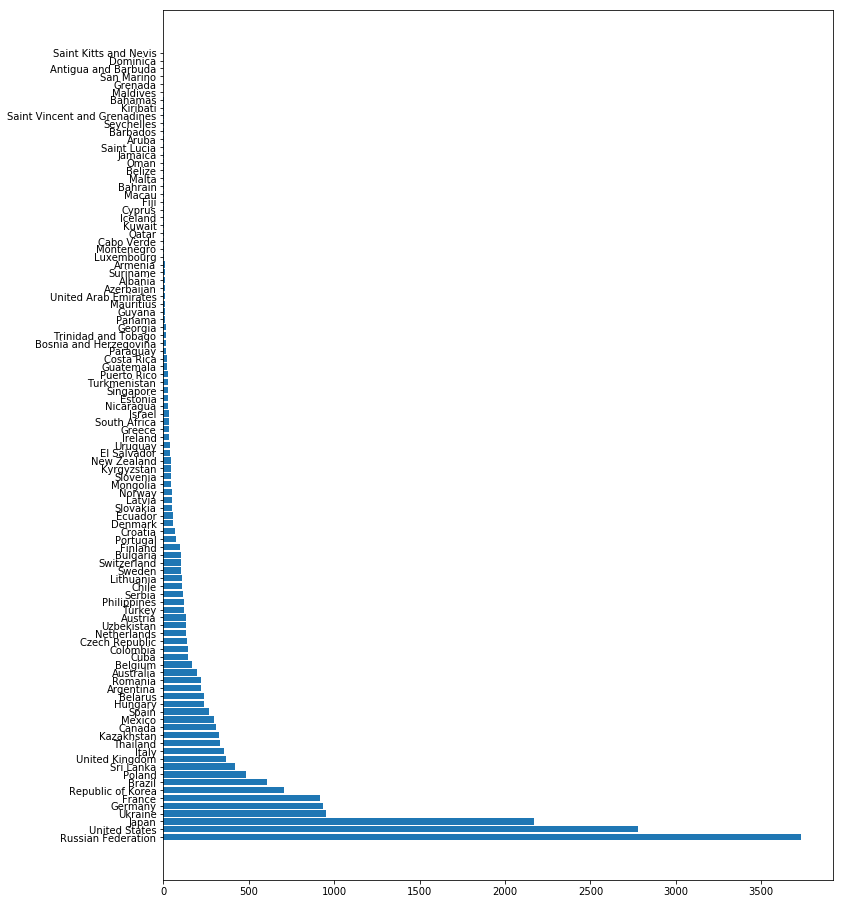

In [22]:
x = list(country_suicide.keys())
y = list(country_suicide.values)
plt.figure(figsize=(12,16))
plt.barh(x,y)
plt.show

>> Russian Federation, United States, Japan has high number of suicides rate.

## Yearly suicides rate analysis

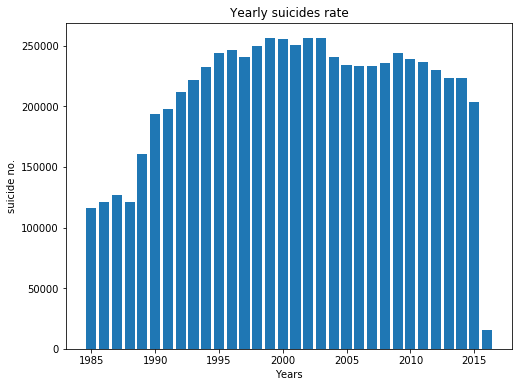

In [23]:
plt.figure(figsize = (8,6))
x = list(data.groupby(['year']).agg('sum')['suicides_no'].keys())
y = list(data.groupby(['year']).agg('sum')['suicides_no'].values)
plt.title("Yearly suicides rate")
plt.xlabel("Years")
plt.ylabel("suicide no.")
plt.bar(x, y)
#plt.set_xticklabels(tic)
plt.show()

>> In 2016 it is very less.

>> After 1990 suicides rate will start increasing.

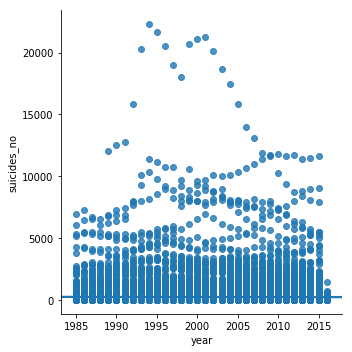

In [24]:
sns.lmplot(x="year", y="suicides_no", data=data)

## Country+year suicide rate analysis

In [25]:
data.groupby('country').agg(['min','max'])['suicides_no'].sort_values(by='max', ascending=False)

,min,max
country,,
Russian Federation,44,22338
United States,50,11767
Japan,12,8948
Ukraine,6,5203
Republic of Korea,8,4255
Germany,5,3427
France,2,3379
Brazil,25,3238
Poland,3,2430


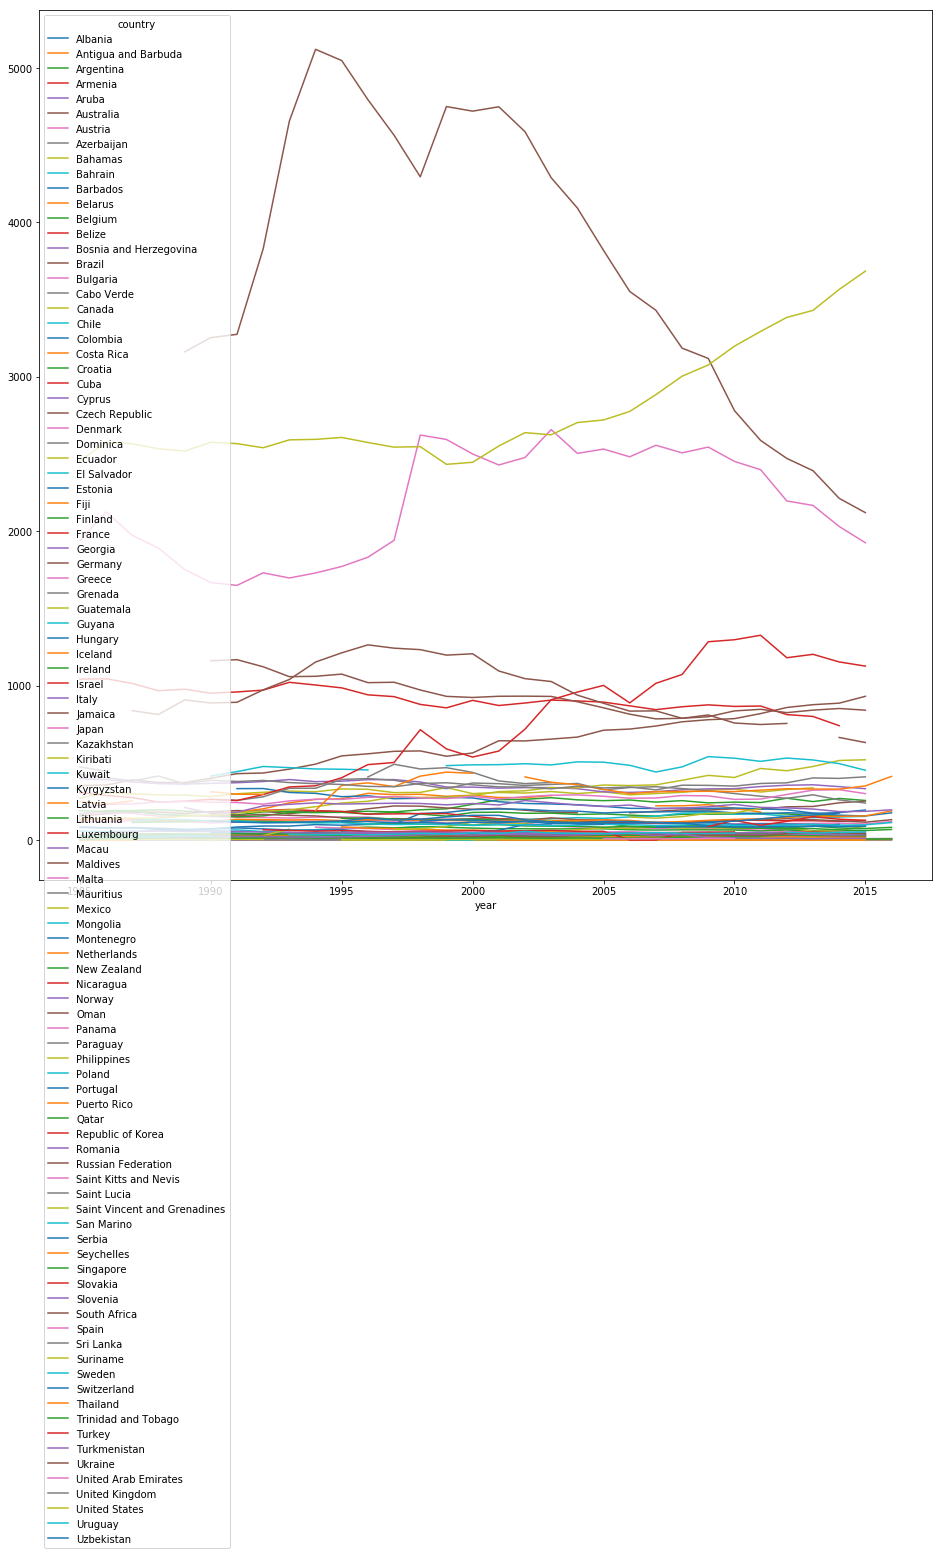

In [26]:
fig, ax = plt.subplots(figsize=(16,16))
country_year_average = data.groupby(['year', 'country']).agg('mean')['suicides_no']
country_year_average.unstack().plot(ax=ax)
country_year_average  = country_year_average.reset_index()


## Plotting only countries having suicides number greater than 1000 with year


In [27]:
country_year_average = country_year_average[country_year_average['suicides_no']>1000]

In [28]:
country_year_average

,year,country,suicides_no
16,1985,France,1041.750000
24,1985,Japan,1938.083333
46,1985,United States,2453.833333
62,1986,France,1044.083333
70,1986,Japan,2123.666667
94,1986,United States,2574.333333
114,1987,France,1013.416667
122,1987,Japan,1971.916667
148,1987,United States,2565.250000
176,1988,Japan,1889.666667


In [29]:
country_year_average.sort_values(by='suicides_no', ascending=False)

,year,country,suicides_no
563,1994,Russian Federation,5118.333333
637,1995,Russian Federation,5045.666667
712,1996,Russian Federation,4792.583333
949,1999,Russian Federation,4747.833333
1124,2001,Russian Federation,4746.500000
1035,2000,Russian Federation,4718.250000
496,1993,Russian Federation,4653.833333
1209,2002,Russian Federation,4585.333333
789,1997,Russian Federation,4562.166667
867,1998,Russian Federation,4293.166667


In [30]:
country_year_average['year']

16      1985
24      1985
46      1985
62      1986
70      1986
94      1986
114     1987
122     1987
148     1987
176     1988
197     1988
225     1989
239     1989
249     1989
273     1990
283     1990
299     1990
312     1990
337     1991
348     1991
365     1991
377     1991
402     1992
412     1992
429     1992
442     1992
467     1993
468     1993
478     1993
496     1993
        ... 
1720    2008
1739    2008
1783    2009
1805    2009
1807    2009
1827    2009
1870    2010
1893    2010
1895    2010
1915    2010
1960    2011
1982    2011
1984    2011
2002    2011
2042    2012
2062    2012
2064    2012
2082    2012
2123    2013
2143    2013
2145    2013
2162    2013
2200    2014
2220    2014
2222    2014
2240    2014
2270    2015
2286    2015
2288    2015
2303    2015
Name: year, Length: 123, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

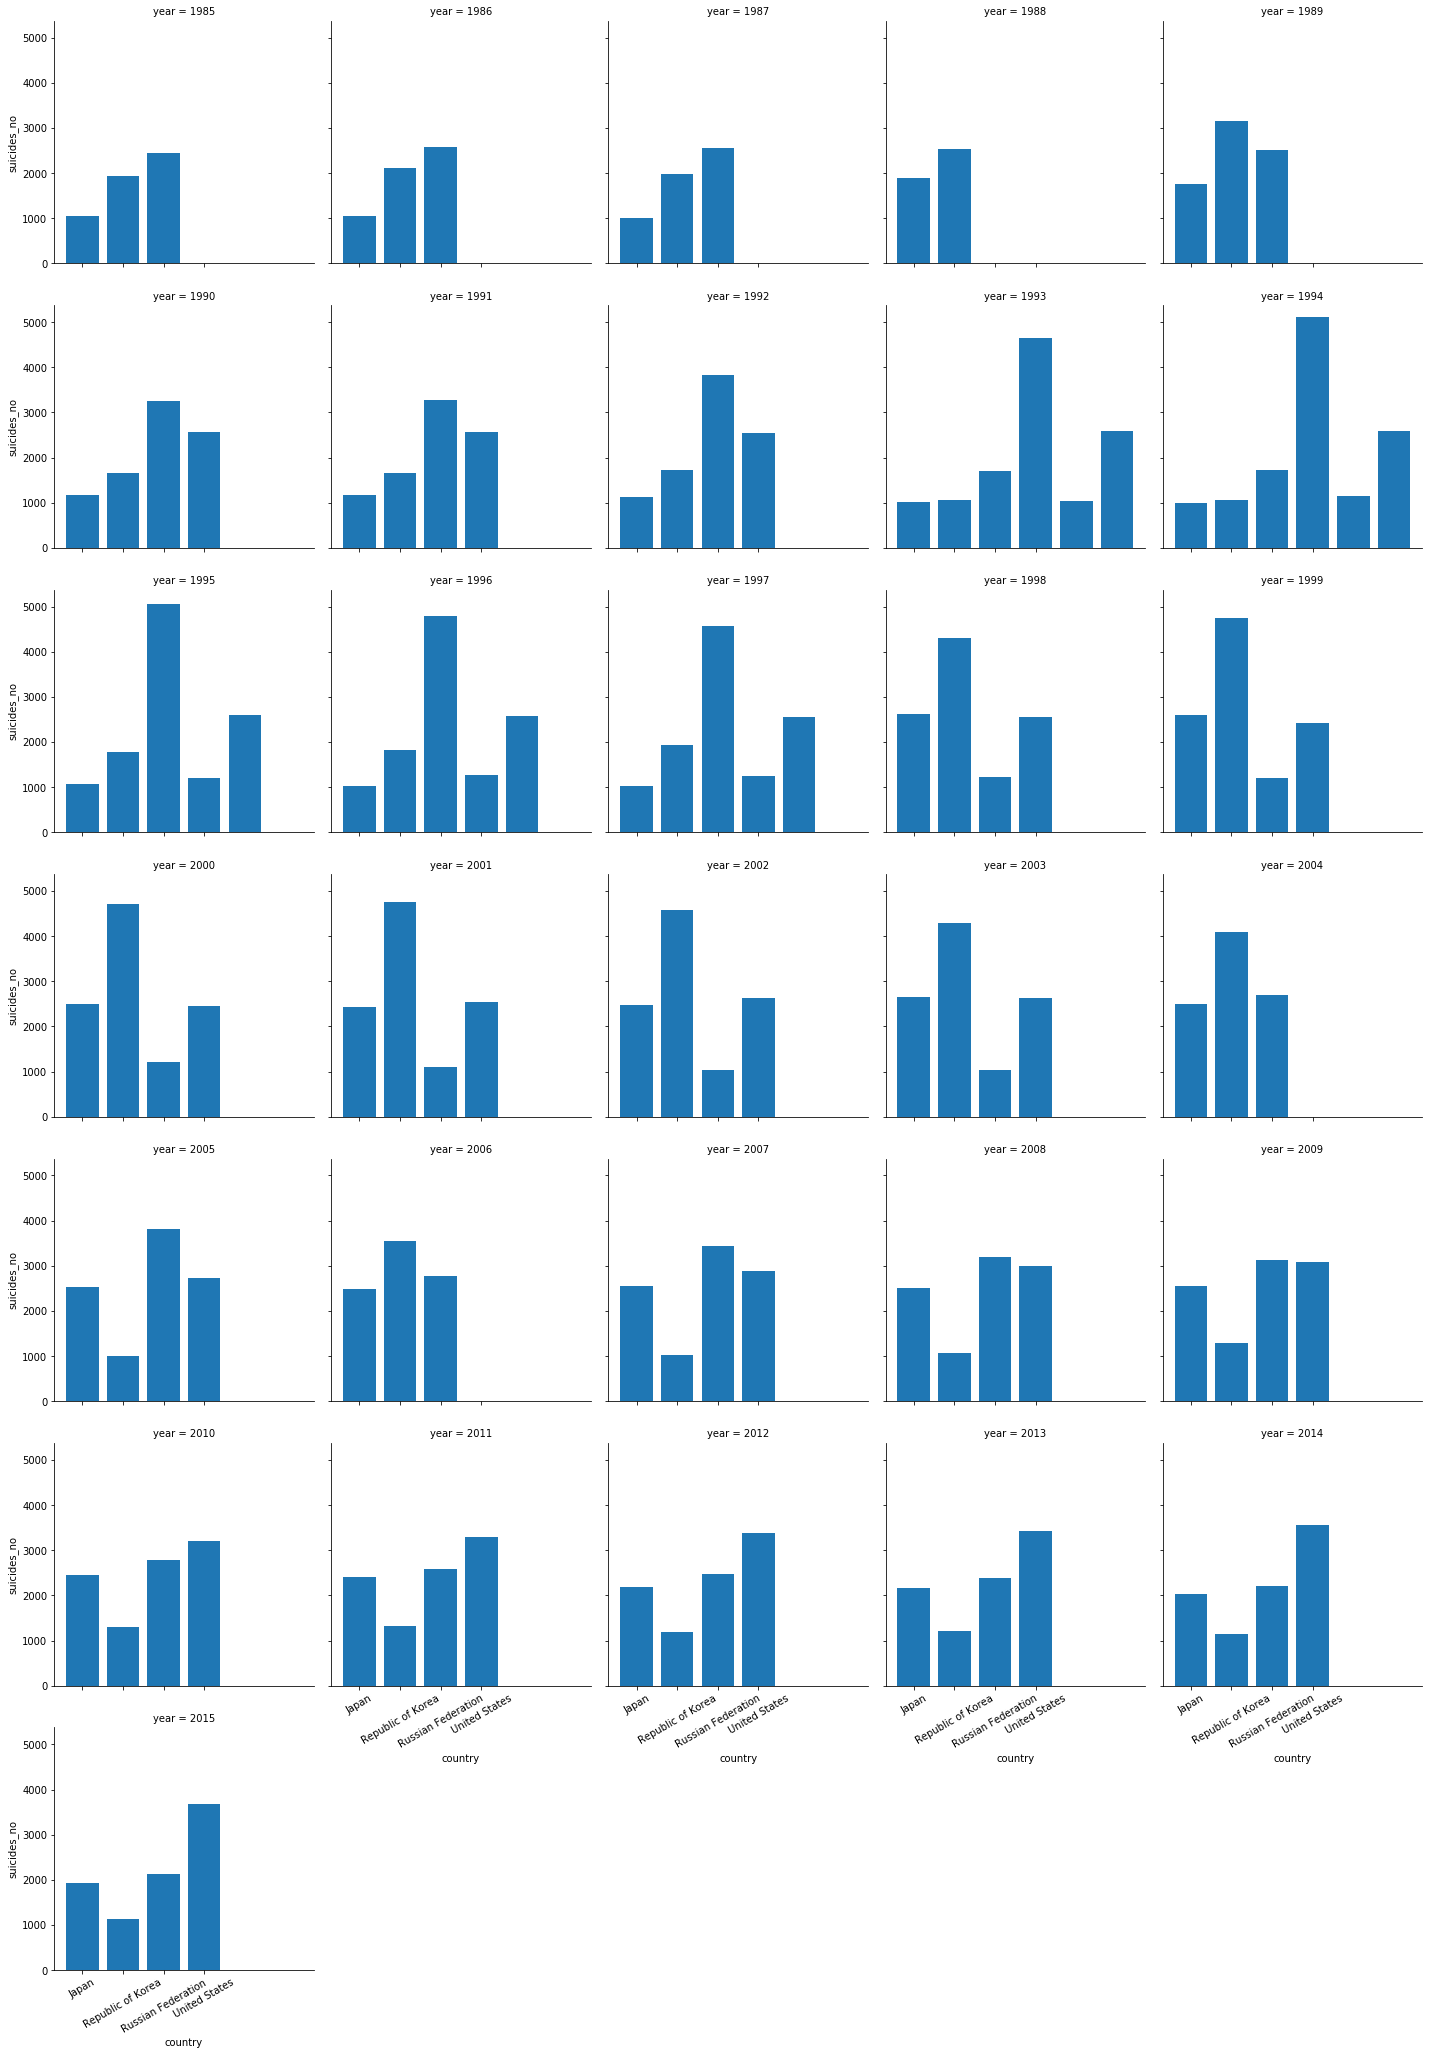

In [31]:
# fig, ax = plt.subplots(figsize=(16,16))
# data.groupby(['country', 'year']).agg('mean')['suicides_no'].unstack().plot(kind='violin',ax=ax)

#country_year_average = data.groupby(['country', 'year']).agg('mean')['suicides_no']
#plt.subplots(figsize=(8,8), )
plt.figure(figsize=(8,8))
g = sns.FacetGrid(country_year_average, col='year', height= 6, size=4, col_wrap=5)
g.map(plt.bar, "country", "suicides_no")
g.set_xticklabels(rotation=30,fontsize=10)

In the above diagrams, we have plotted countries having suicides rates > 1000 are considered only so, we have Japan, Republic of Korea, Russian Federation, United States. In some years some of the countries doesn't have any suicides rate.

## Checking suicides_no by age-group


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 288x576 with 0 Axes>

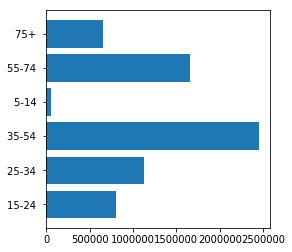

In [32]:
plt.figure(figsize=(4,8))
x = list(data.groupby(['age']).agg('sum')['suicides_no'].keys())
y= list(data.groupby(['age']).agg('sum')['suicides_no'].values)
plt.figure(figsize=(4,4))
plt.barh(x,y)
plt.show

## Checking count of both genders in all

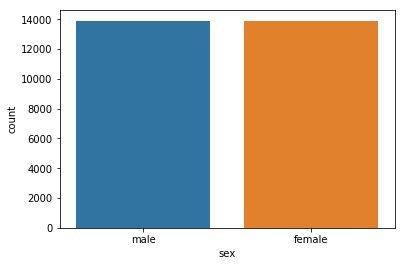

In [33]:
sns.countplot(x='sex', data=data)

## Country+sex suicide rate analysis

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

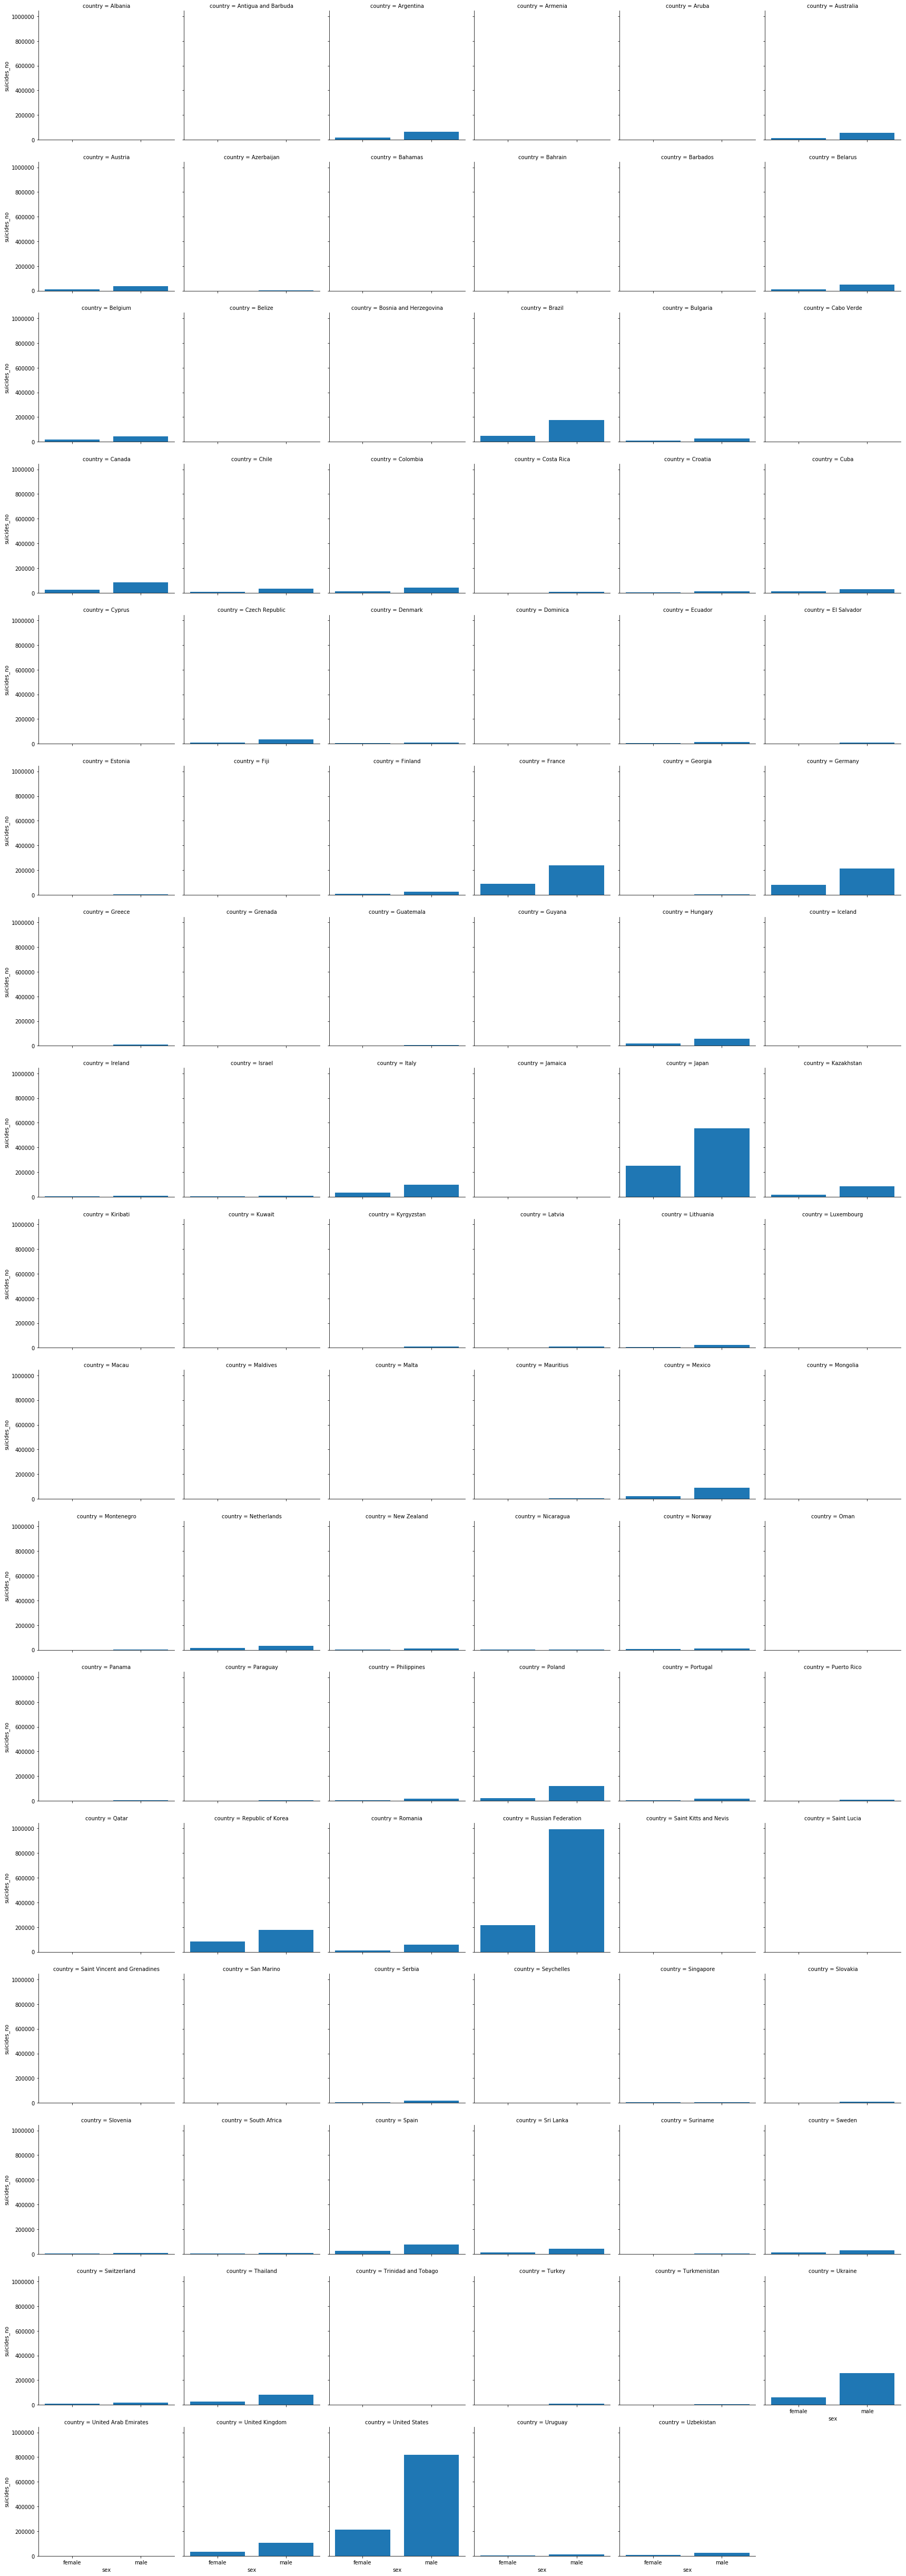

In [34]:
count_sex_total = data.groupby(['country','sex']).agg('sum')['suicides_no'].reset_index()

plt.figure(figsize=(8,8))
g = sns.FacetGrid(count_sex_total, col="country", height=6, size=4, col_wrap=6)
g.map(plt.bar, "sex", "suicides_no")
plt.show()

>> In Brazil, France, Germany, Mexico, Poland, Russian Federation, Ukraine, United States huge difference between female and male


## Count of suicides by gender

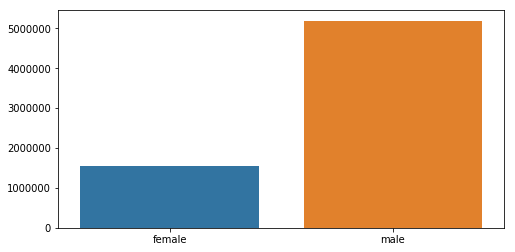

In [35]:
plt.figure(figsize=(8,4))
x = list(data.groupby(['sex']).agg('sum')['suicides_no'].keys())
y= list(data.groupby(['sex']).agg('sum')['suicides_no'].values)
sns.barplot(x, y, data=data)
plt.show()

## Age+Gender suicide rate analysis

In [36]:
age_gender_suicides_sum = data.groupby(['sex','age']).agg('sum')['suicides_no'].reset_index()

In [37]:
age_gender_suicides_sum

,sex,age,suicides_no
0,female,15-24,175437
1,female,25-34,208823
2,female,35-54,506233
3,female,5-14,16997
4,female,55-74,430036
5,female,75+,221984
6,male,15-24,633105
7,male,25-34,915089
8,male,35-54,1945908
9,male,5-14,35267


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

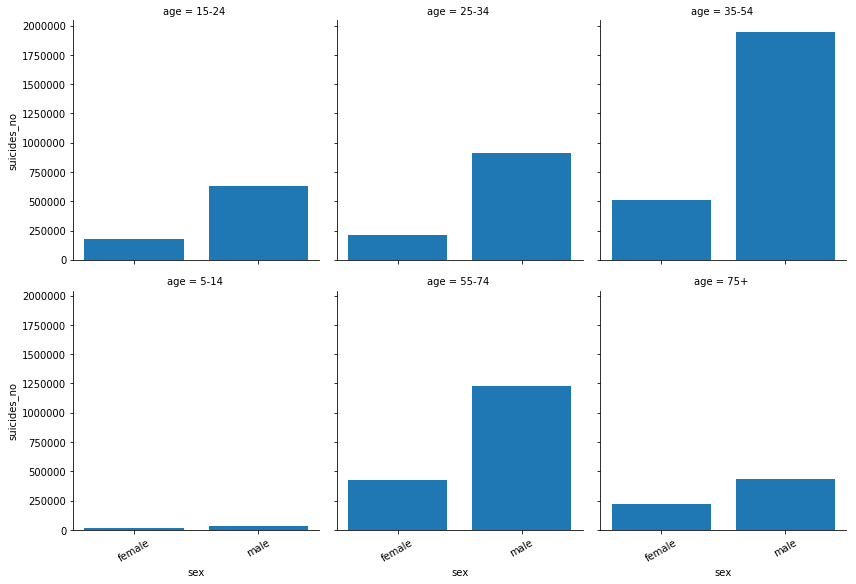

In [38]:
plt.figure(figsize=(8,8))
g = sns.FacetGrid(age_gender_suicides_sum, col='age', height= 6, size=4, col_wrap=3)
g.map(plt.bar, "sex", "suicides_no")
g.set_xticklabels(rotation=30,fontsize=10)

## Generation Analysis

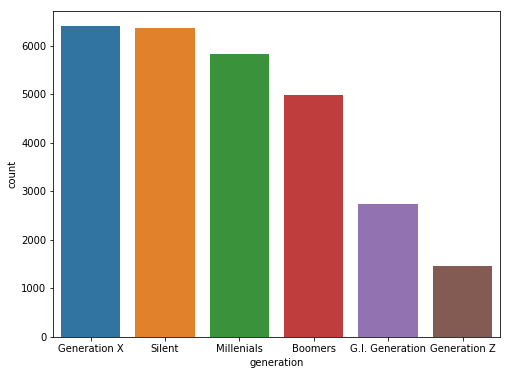

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='generation', data=data, order = data['generation'].value_counts().index)
plt.show()

## Generation + Age analysis

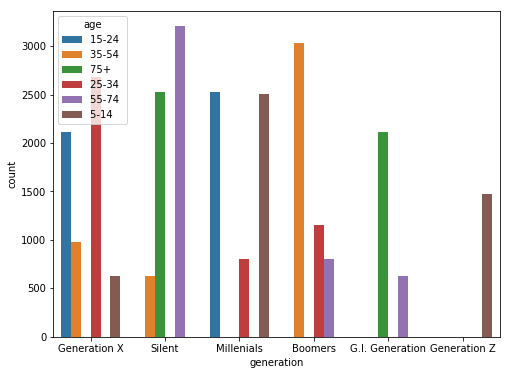

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='generation', data=data, order = data['generation'].value_counts().index, hue='age')
plt.show()

Generation with age doesn't reveal much as generations category are created based on age distribution itself.


Generation Analysis -:

> Generation Z : small children(5-14)

> Millenials : Youngesters + smallchildren (5-34)

> Boomers :  Youngsters + Middle_age (25-74)

> Silent: Middle_age (35-75)

> Generation X : Middle_age + youngesters + smallchildren (5-54)

> G.I Generation : Old (55-75)

In [41]:
data.groupby(['generation']).agg(['sum'])['suicides_no']

,sum
generation,
Boomers,2284498
G.I. Generation,510009
Generation X,1532804
Generation Z,15906
Millenials,623459
Silent,1781744


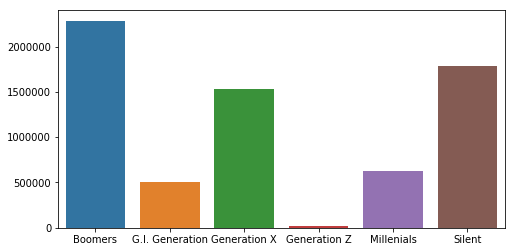

In [42]:
plt.figure(figsize=(8,4))
x = list(data.groupby(['generation']).agg('sum')['suicides_no'].keys())
y= list(data.groupby(['generation']).agg('sum')['suicides_no'].values)
sns.barplot(x, y, data=data)
plt.show()

So, we can conclude from above graph -:

1. Generation Z -: small_children has very low chance to suicide
2. G.I Generation -: old people do but comparatively less
3. Millenials -: youngsters alone not much
4. Boomers, Silen -: middle age and youngsters are doing more suicides
5. generation_x -: all (small children, youngsters, middle age) so has high number.


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x288 with 0 Axes>

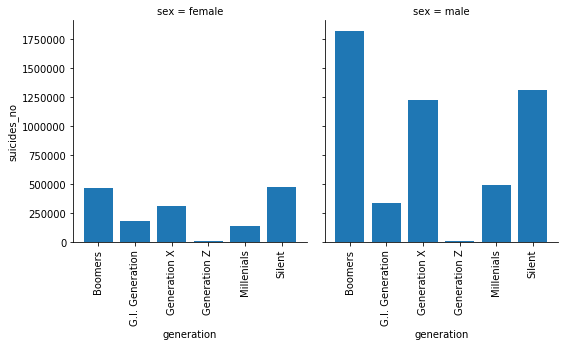

In [43]:
generation_gender_sum = data.groupby(['generation', 'sex']).agg('sum')['suicides_no'].reset_index()

plt.figure(figsize= (12,4))
g = sns.FacetGrid(generation_gender_sum, col='sex', height=6, size=4)
g.map(plt.bar, "generation", "suicides_no")
g.set_xticklabels(rotation=90)

In [44]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

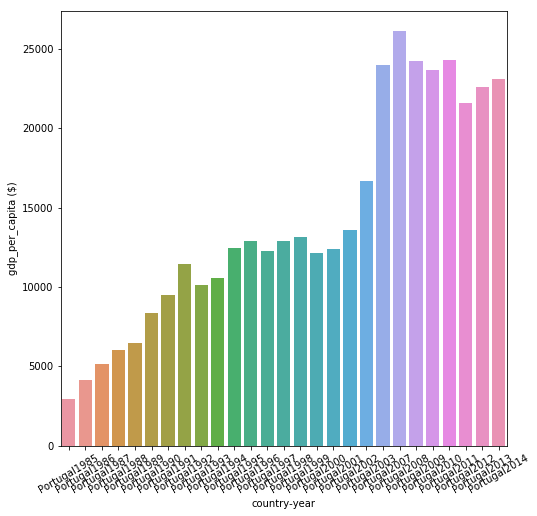

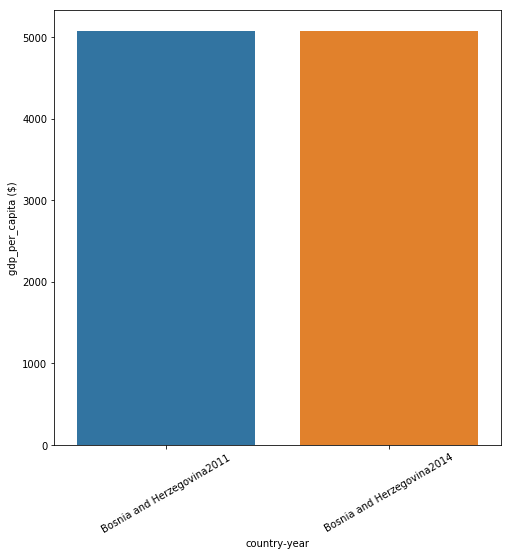

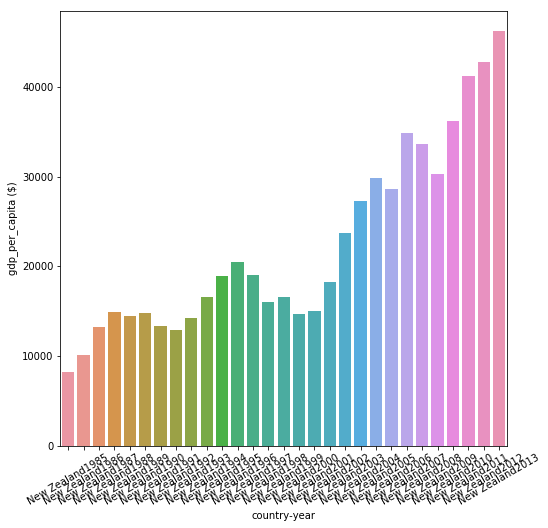

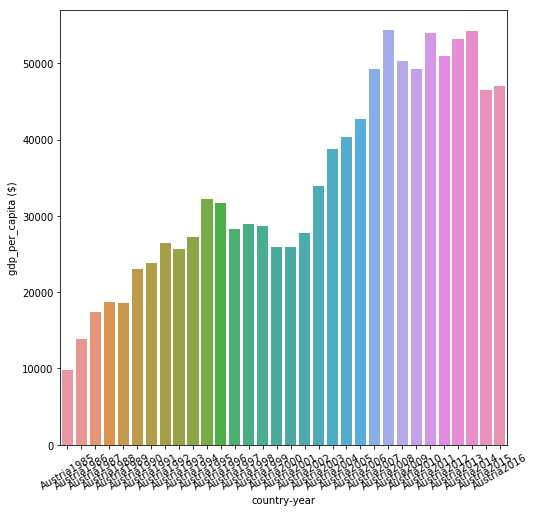

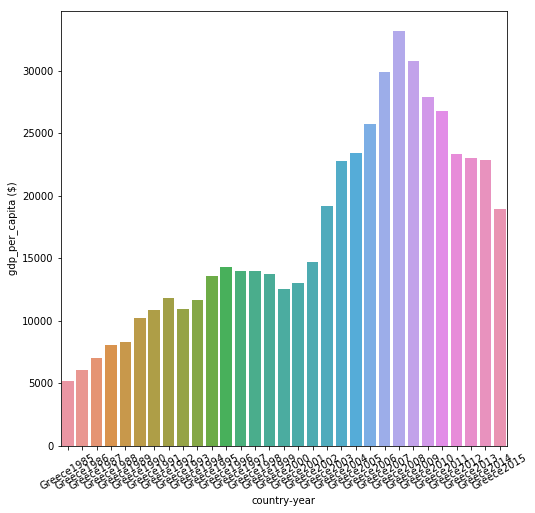

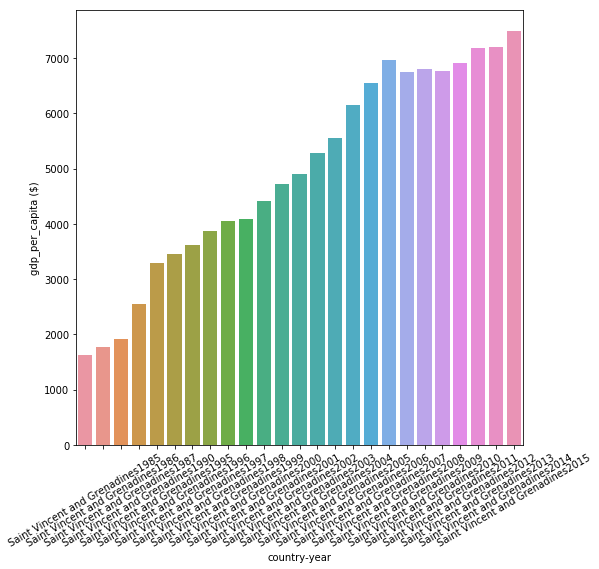

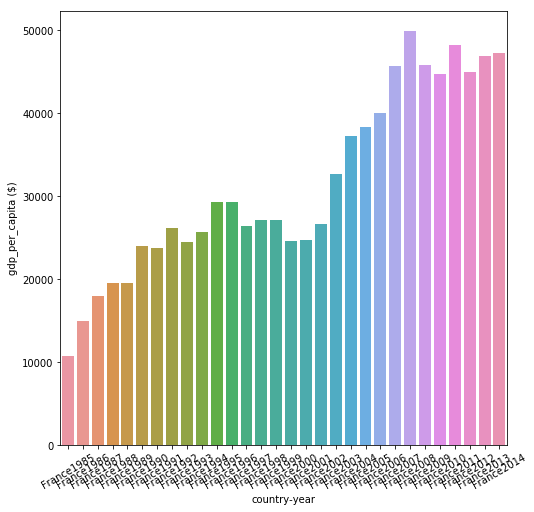

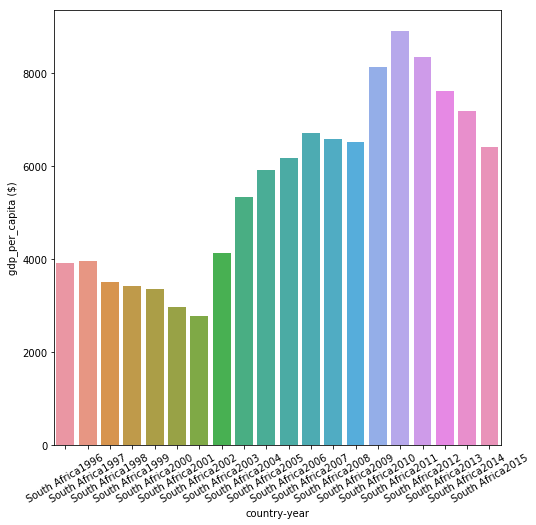

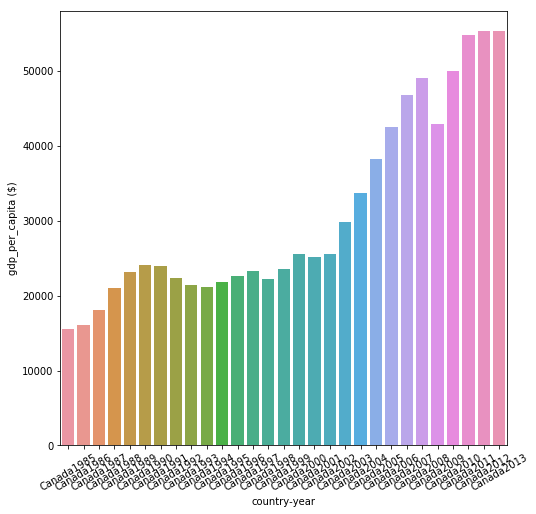

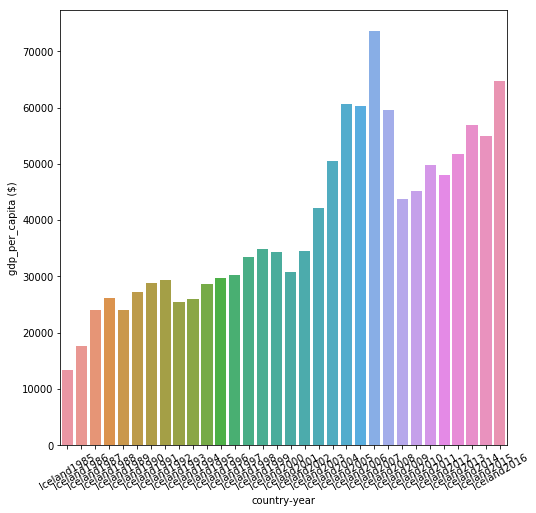

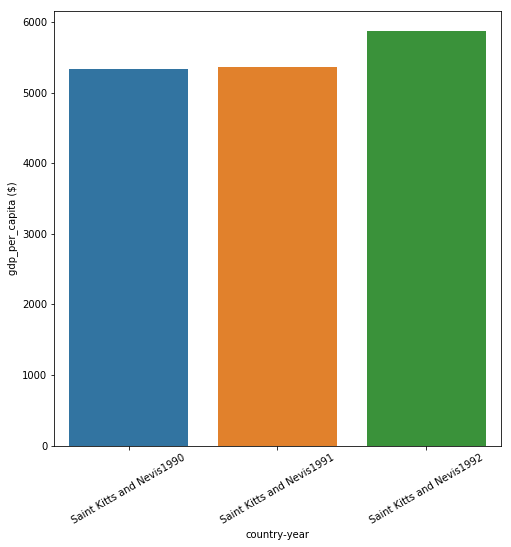

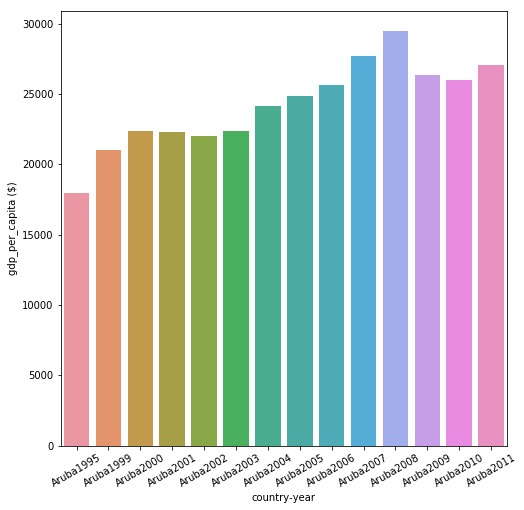

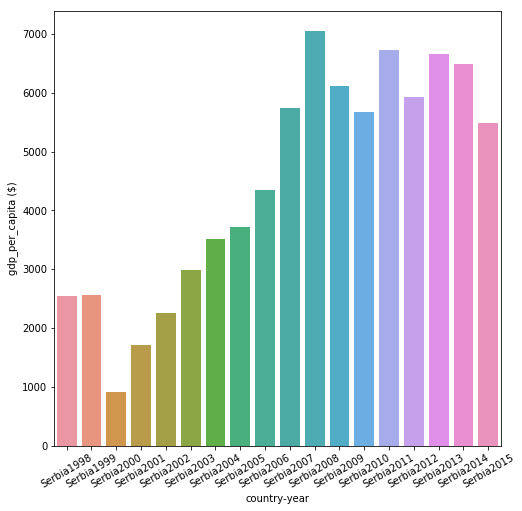

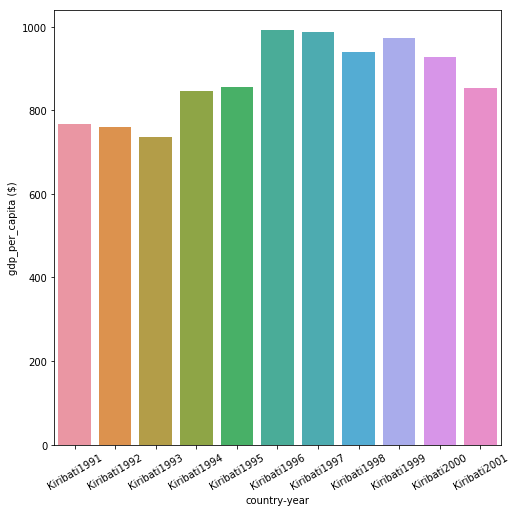

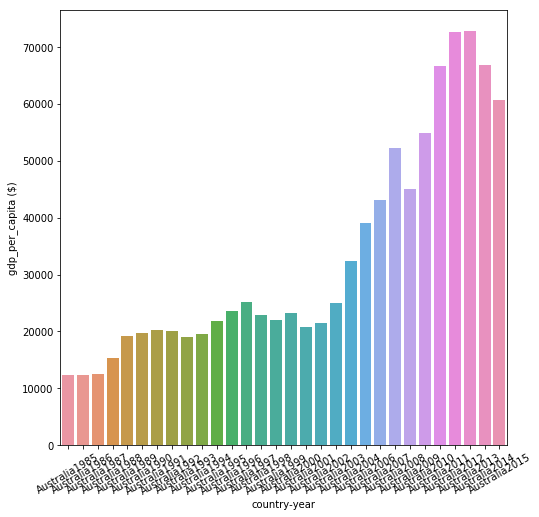

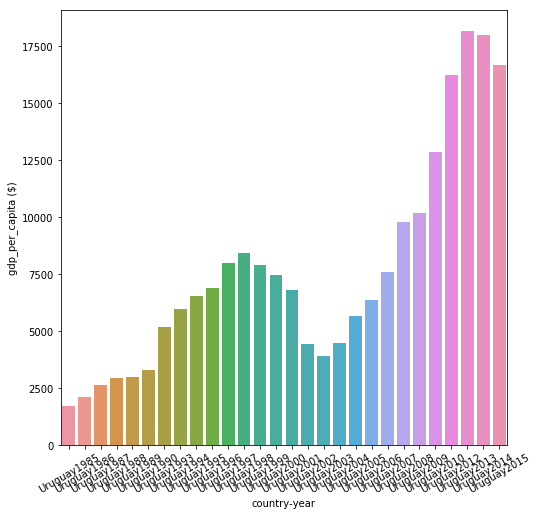

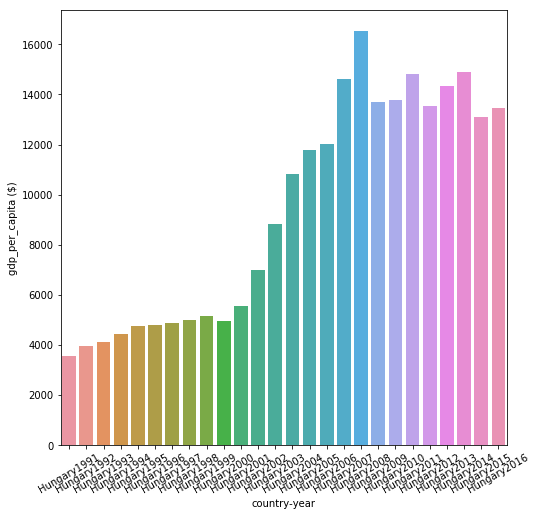

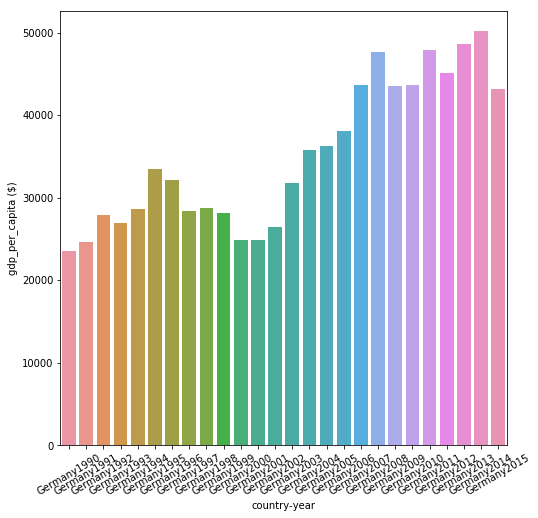

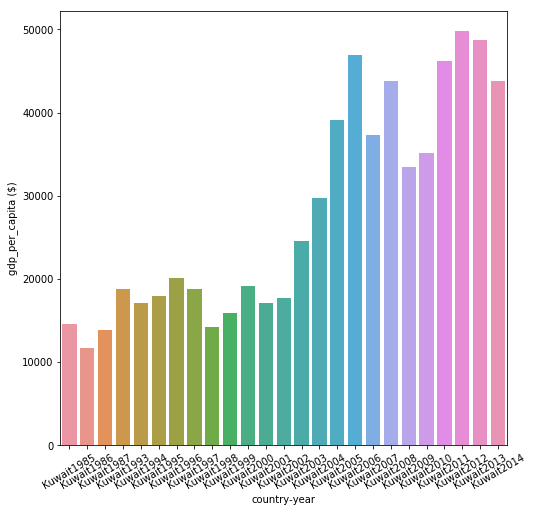

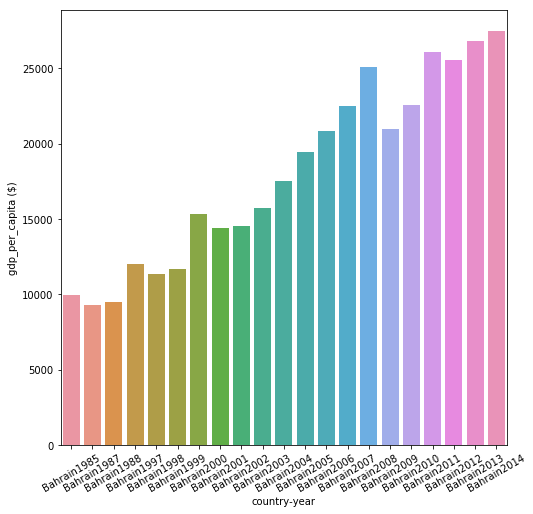

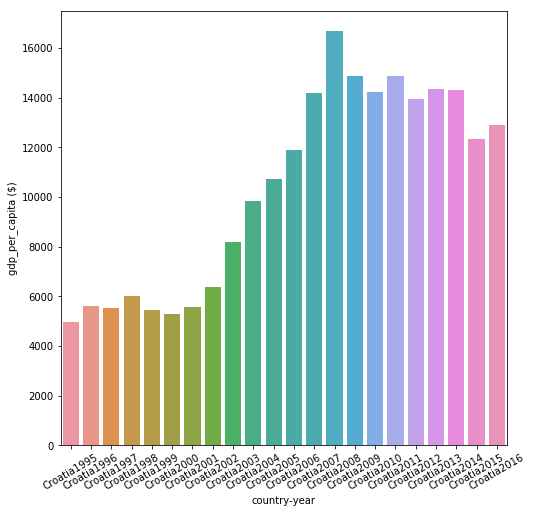

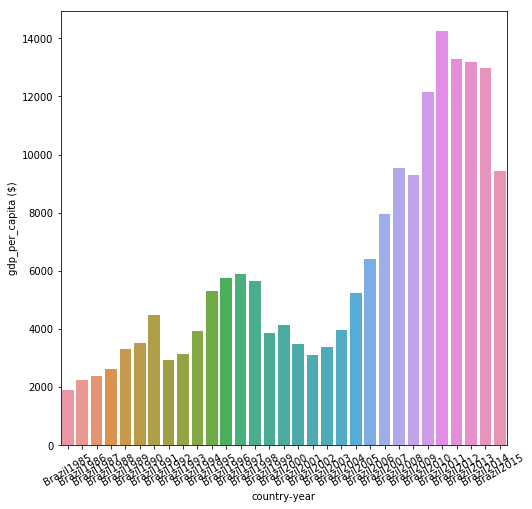

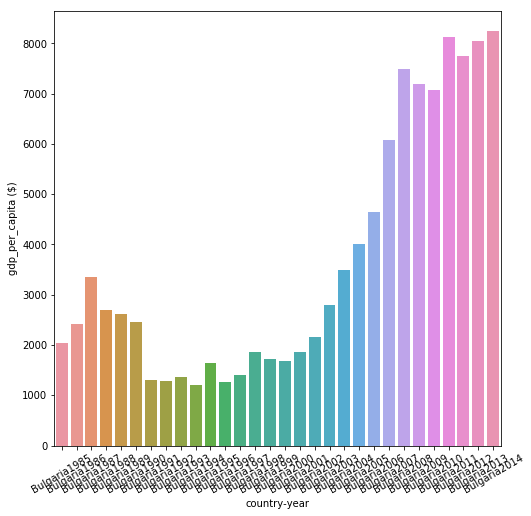

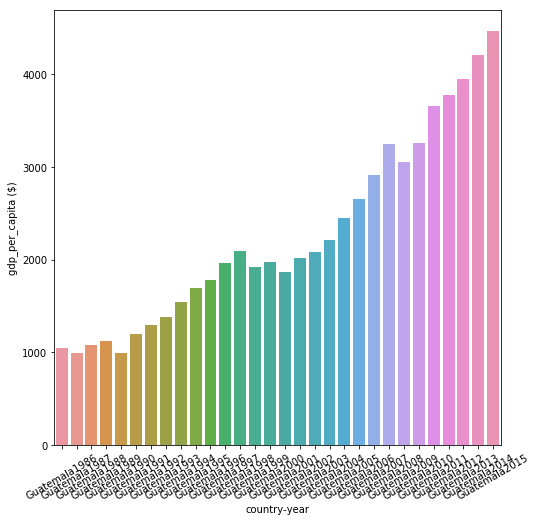

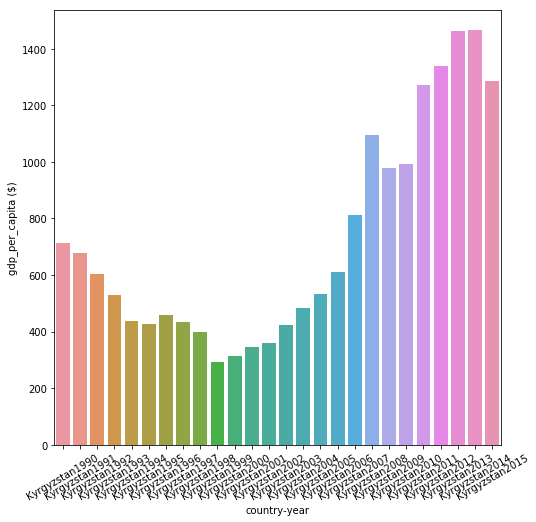

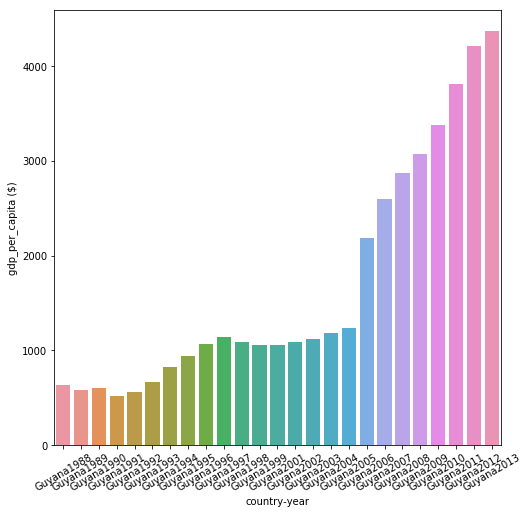

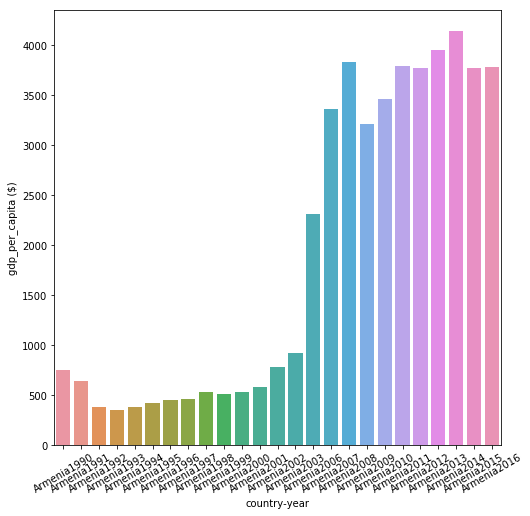

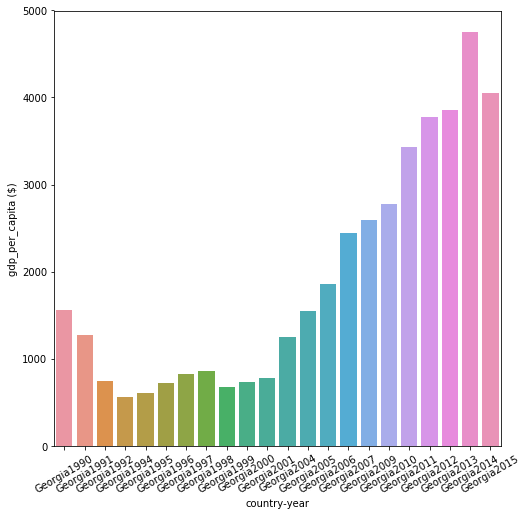

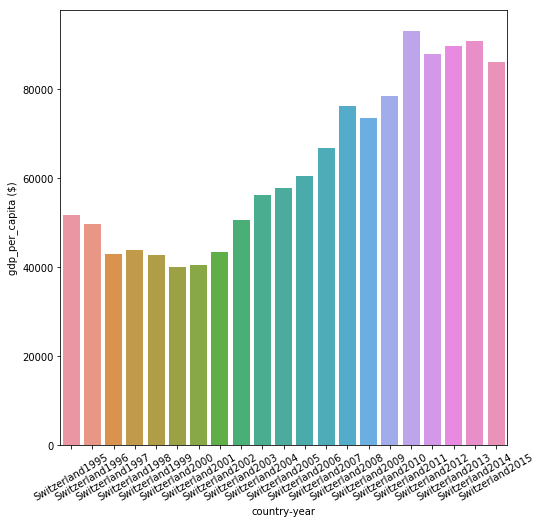

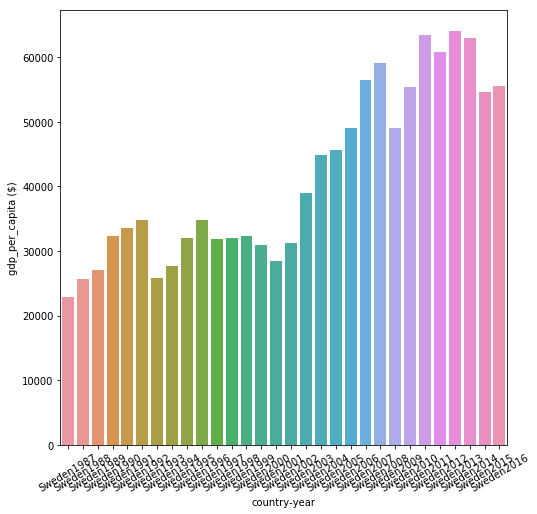

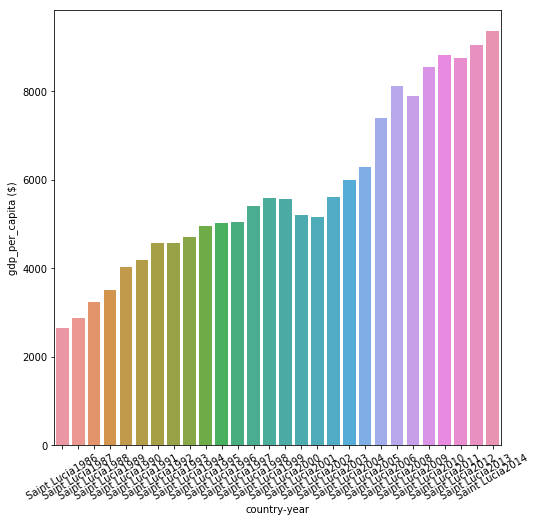

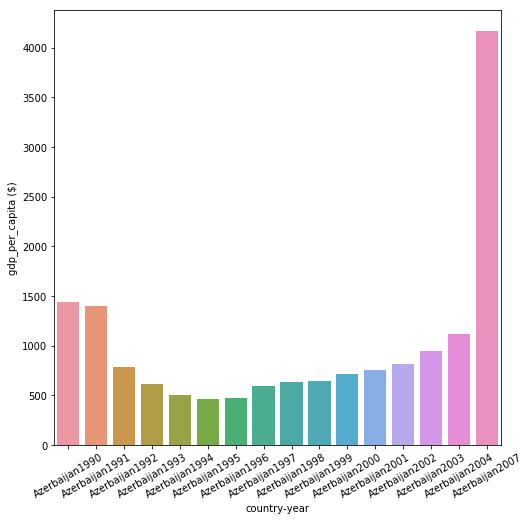

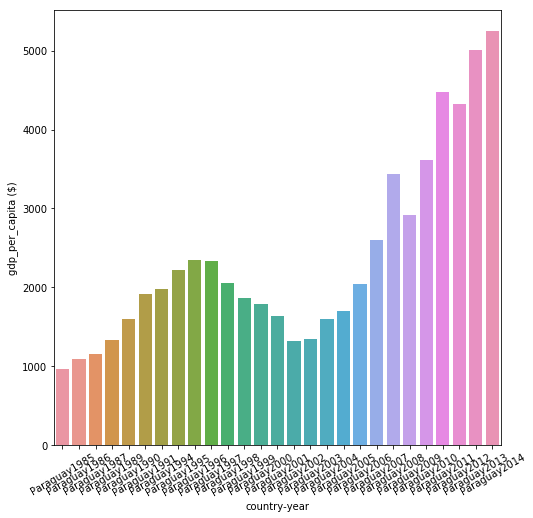

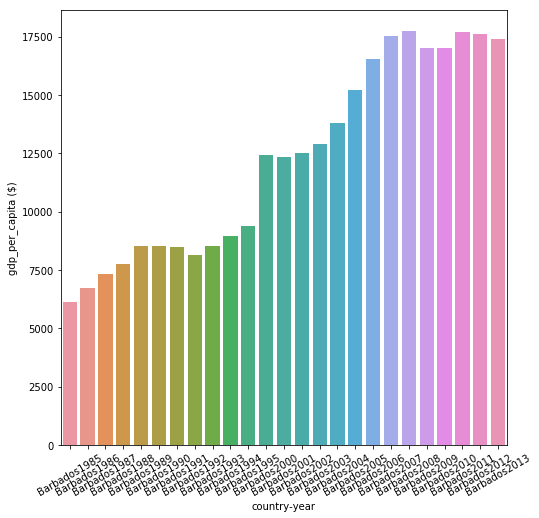

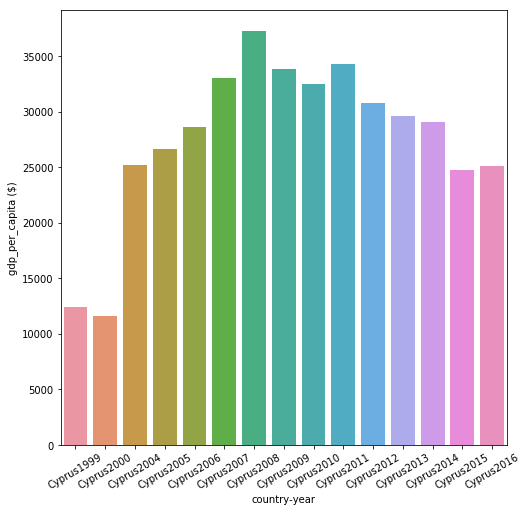

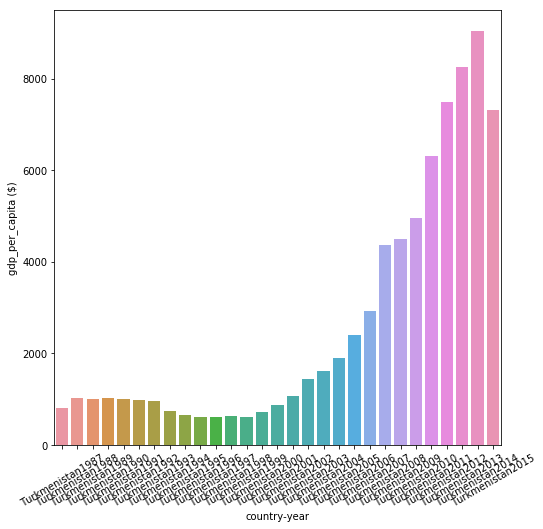

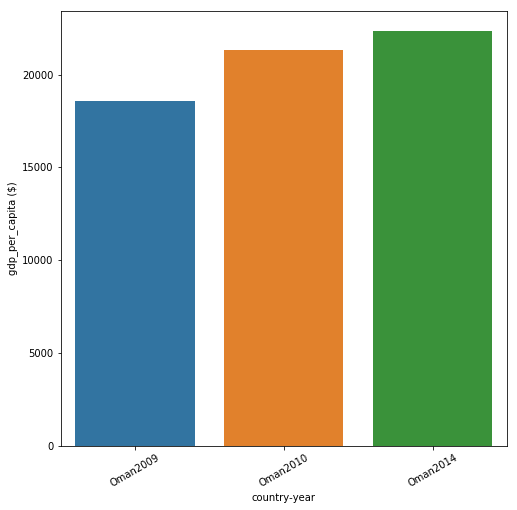

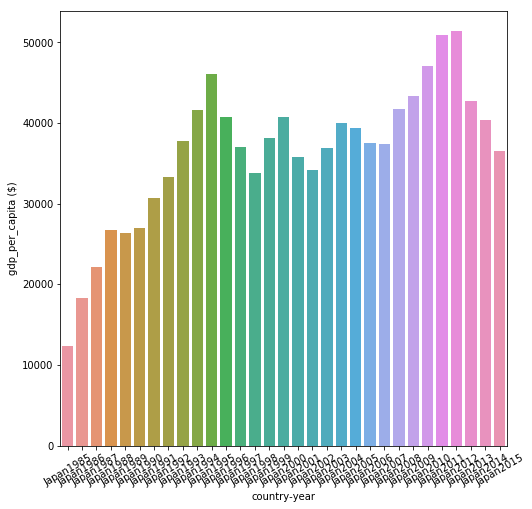

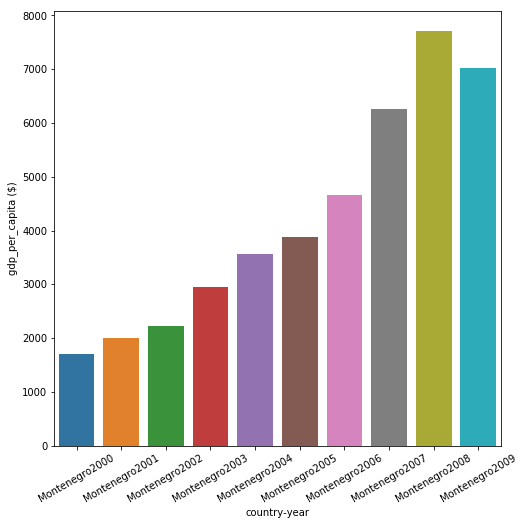

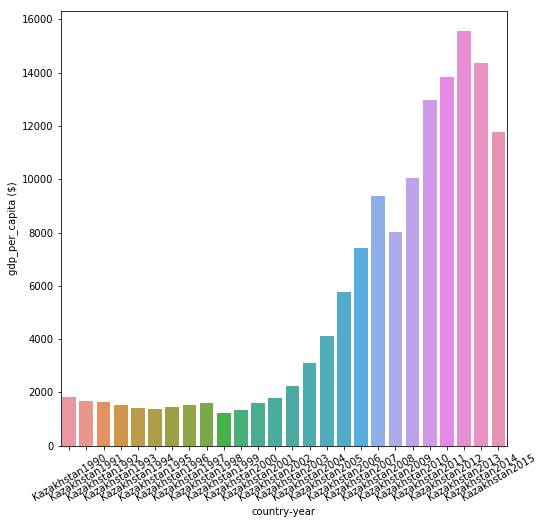

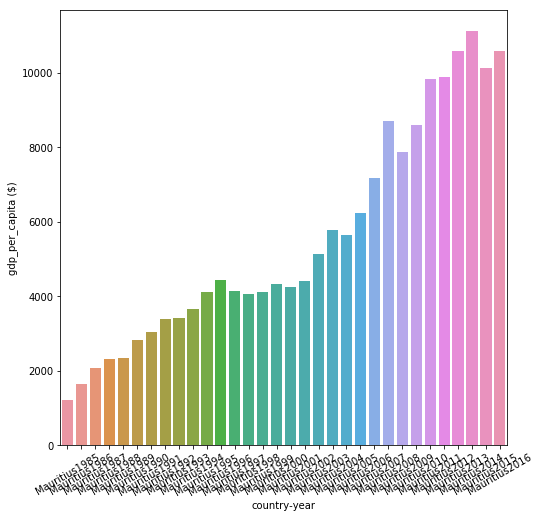

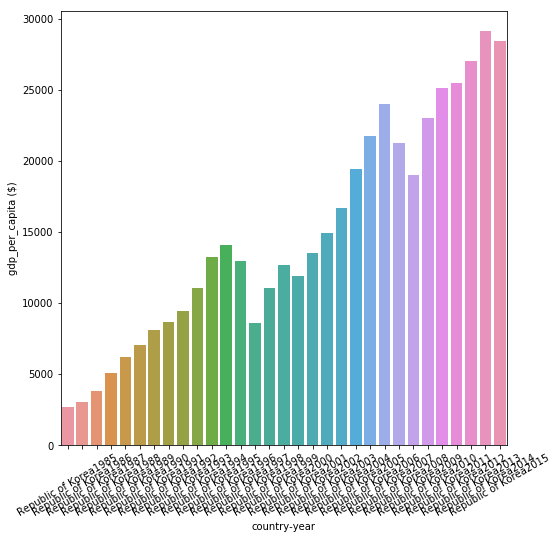

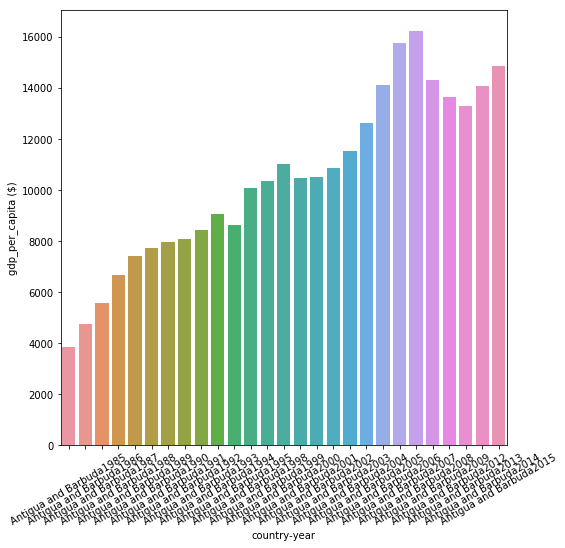

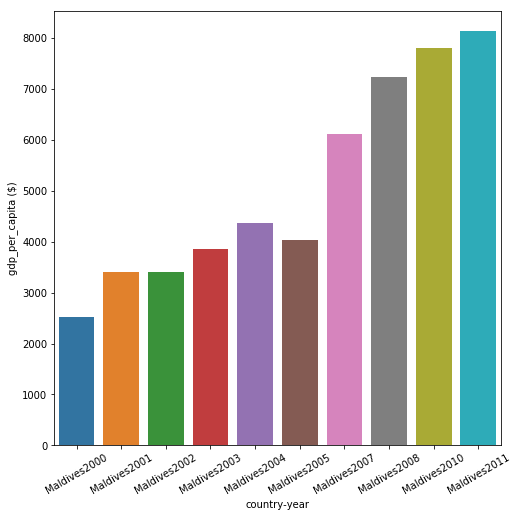

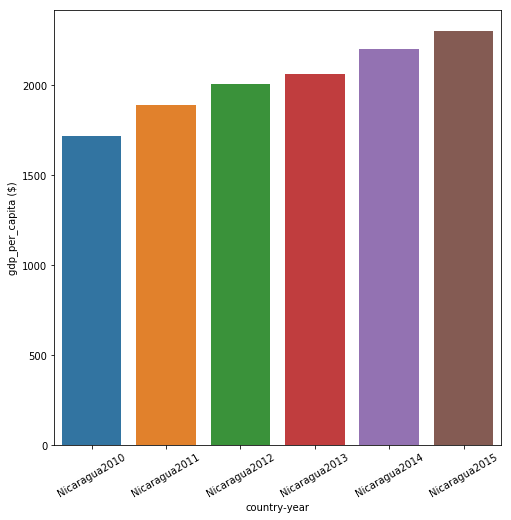

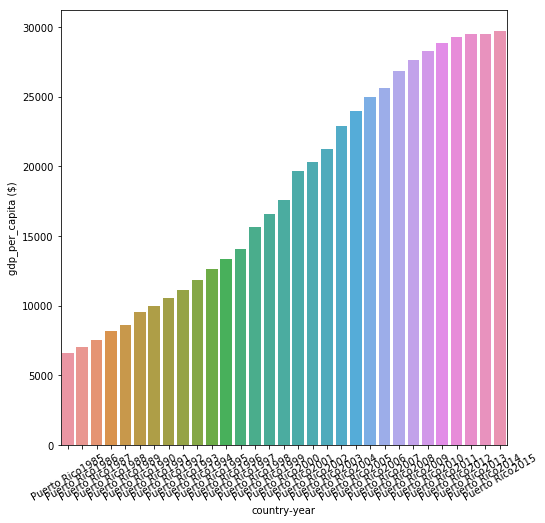

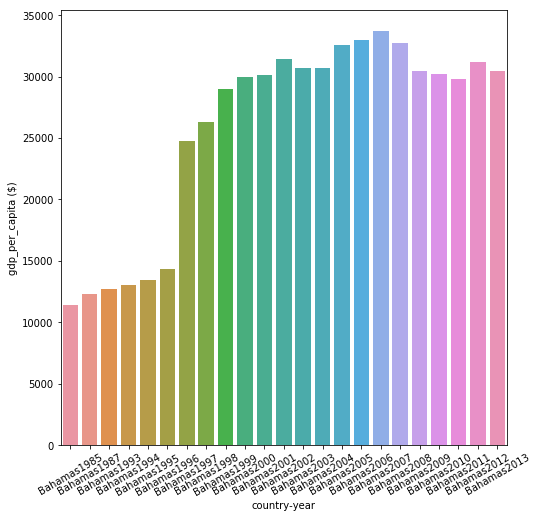

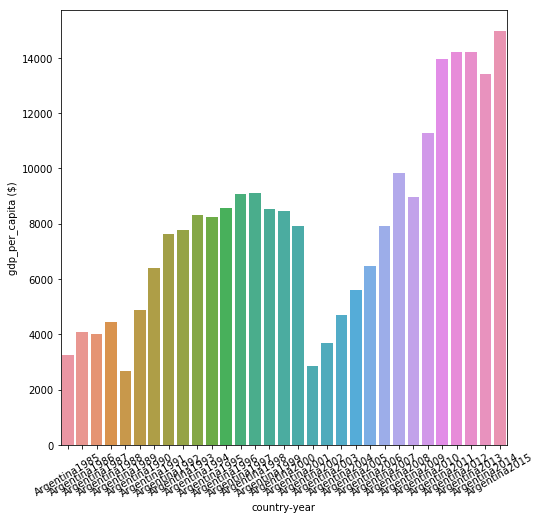

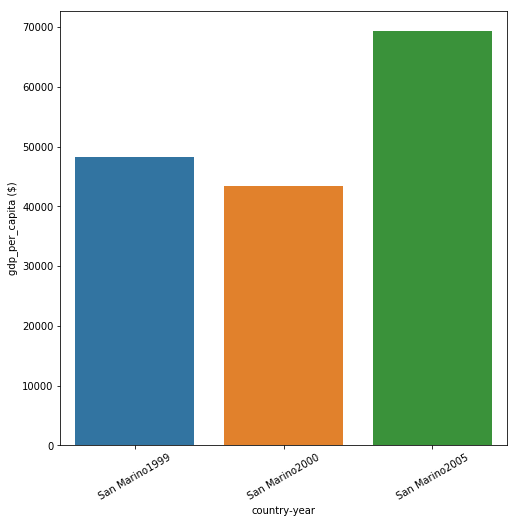

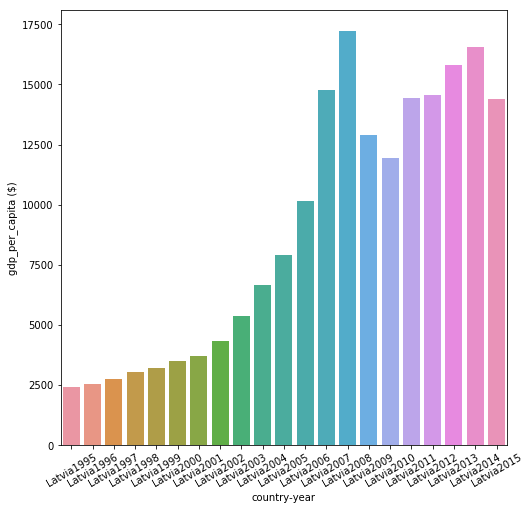

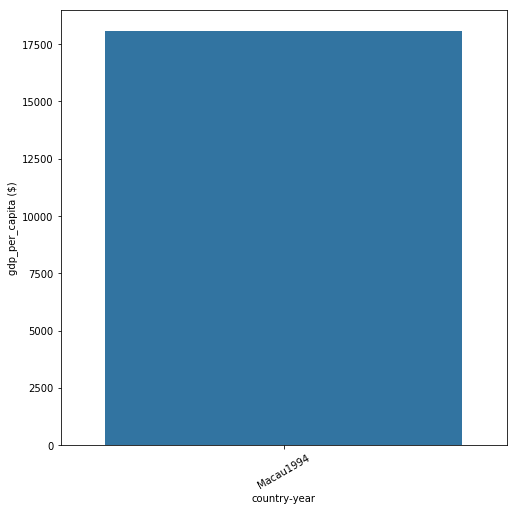

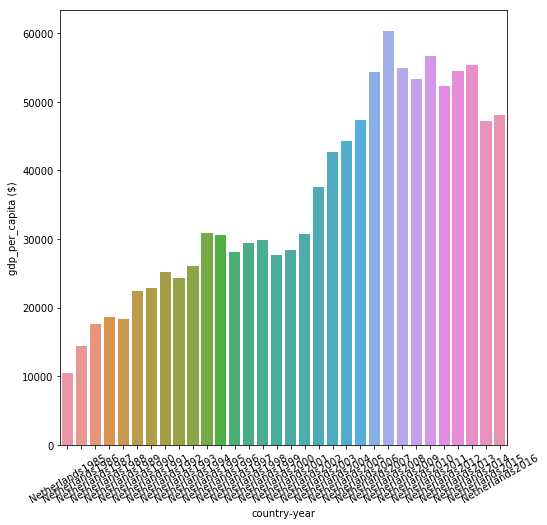

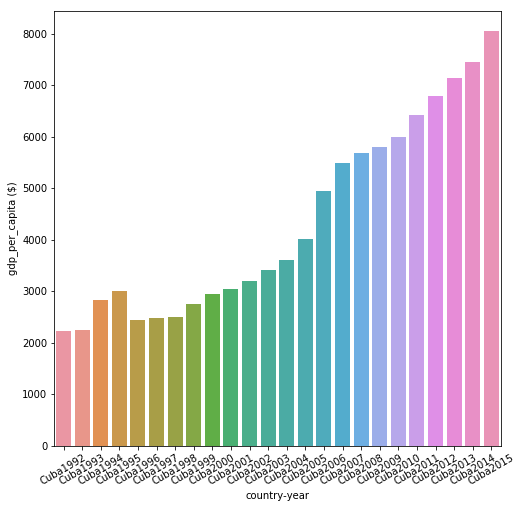

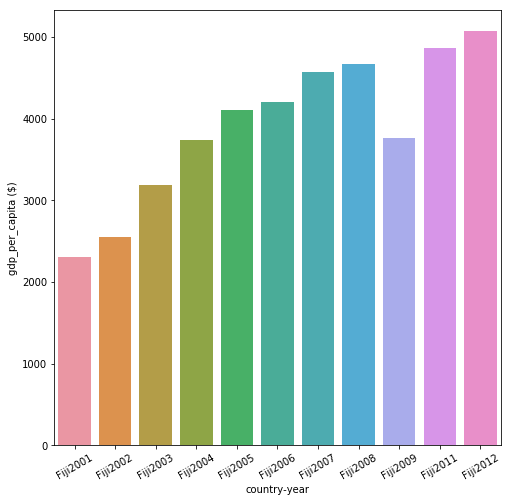

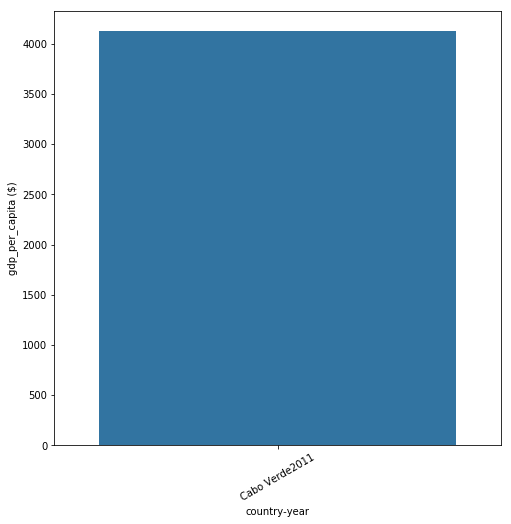

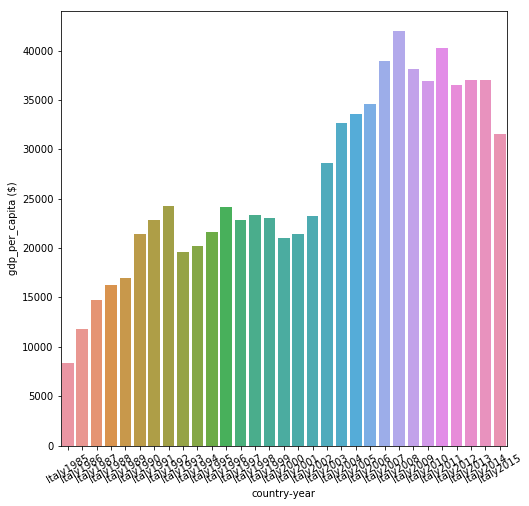

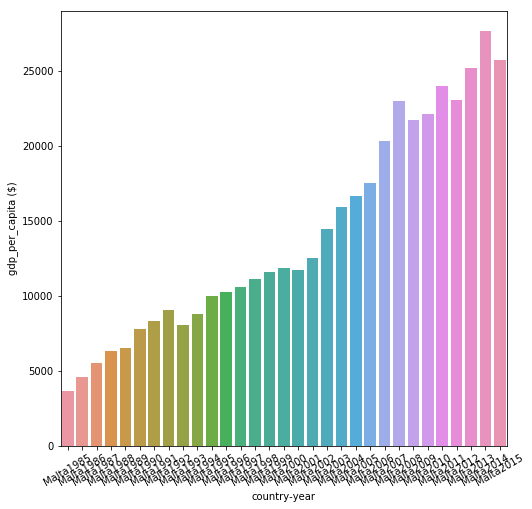

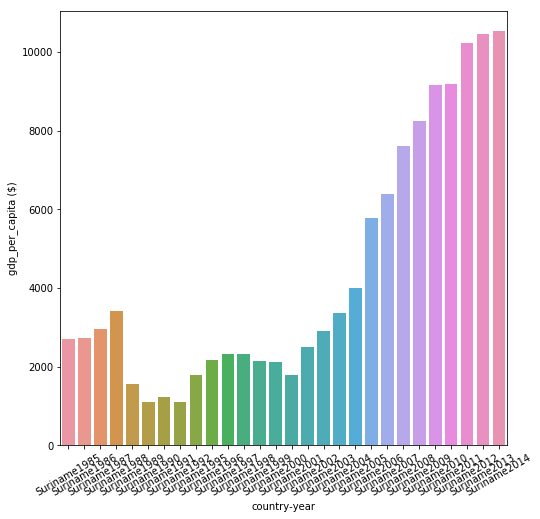

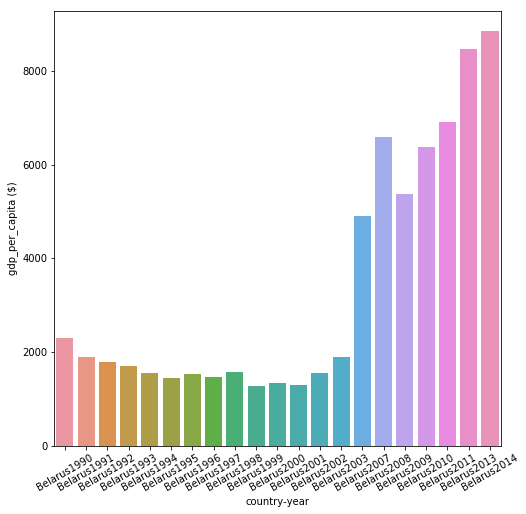

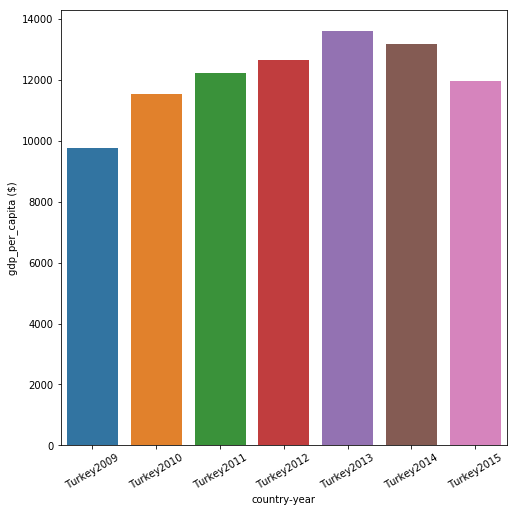

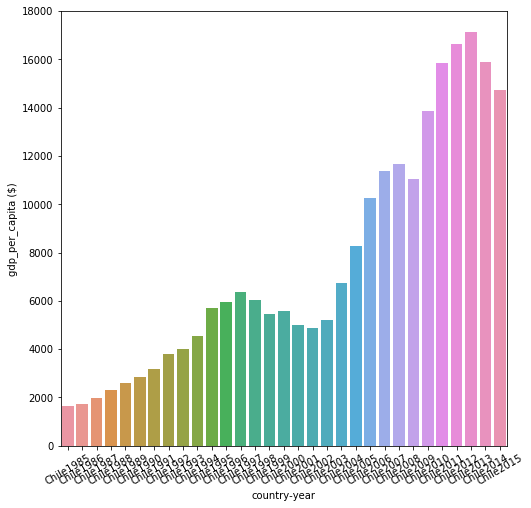

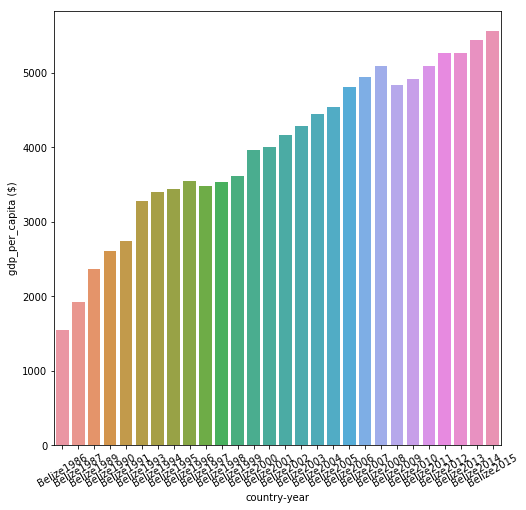

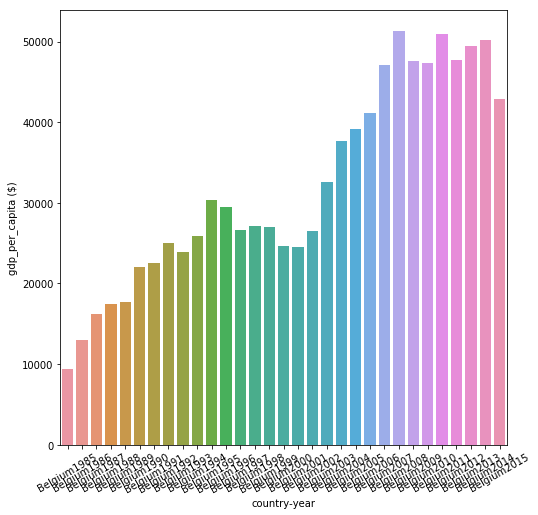

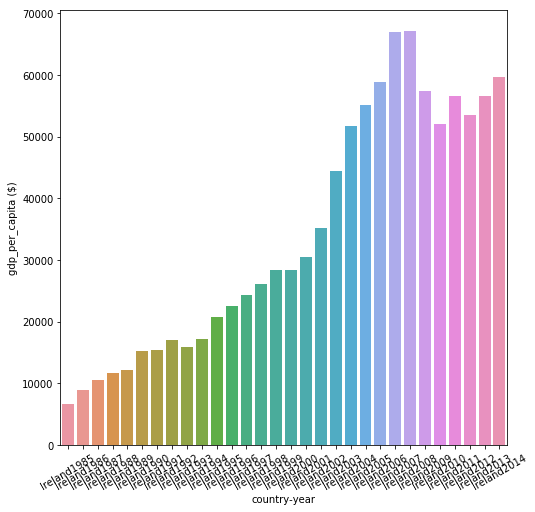

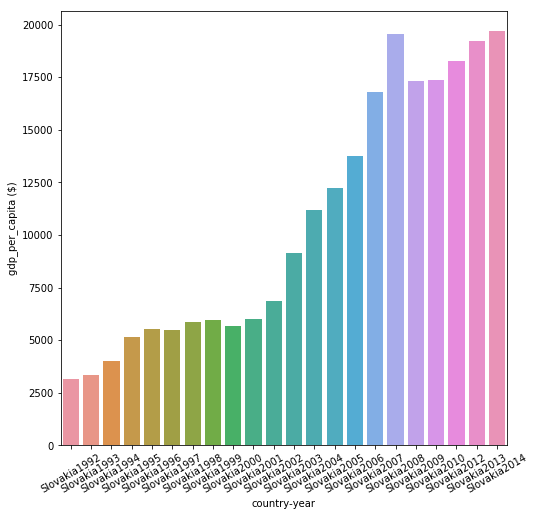

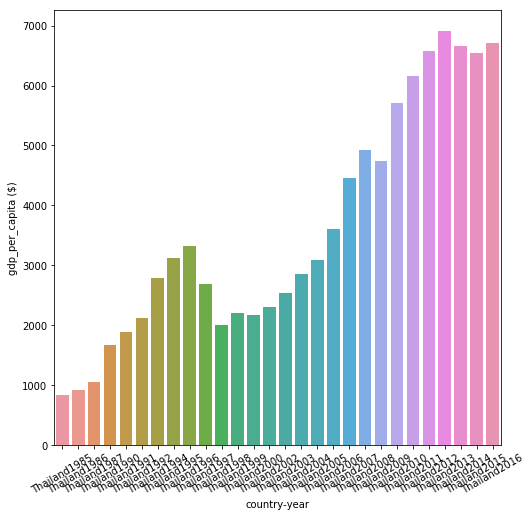

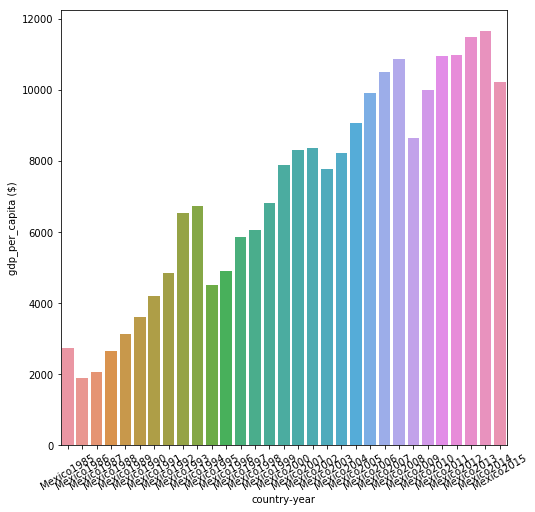

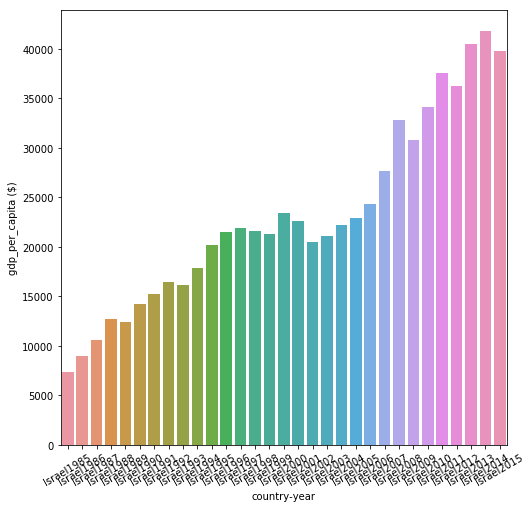

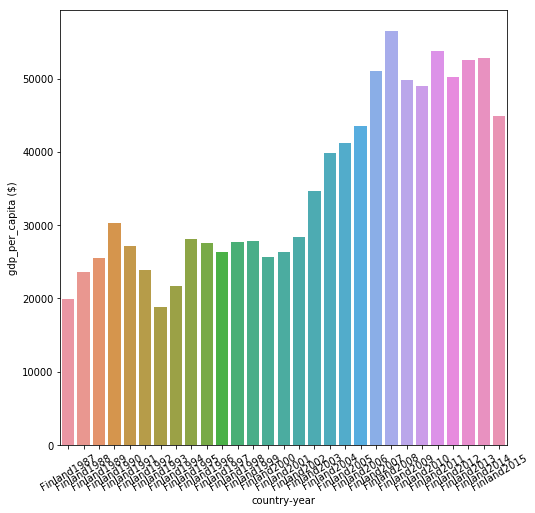

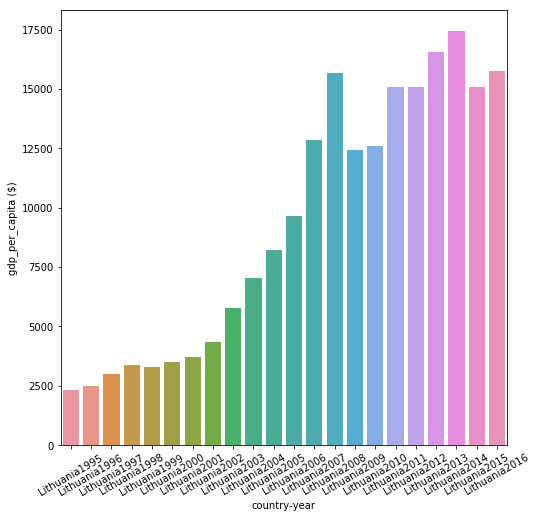

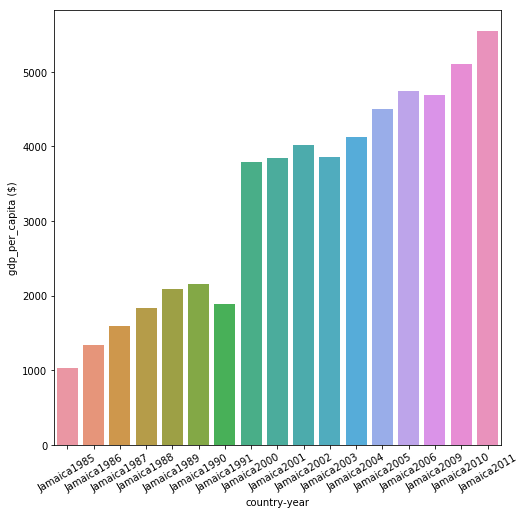

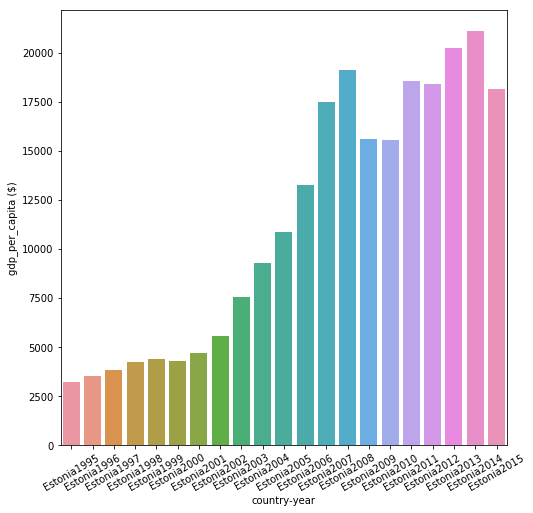

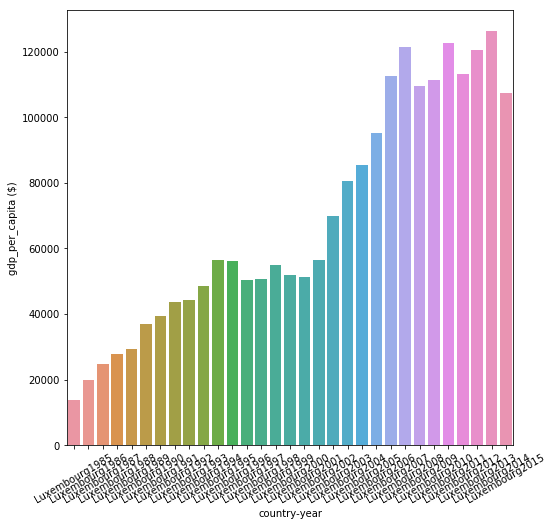

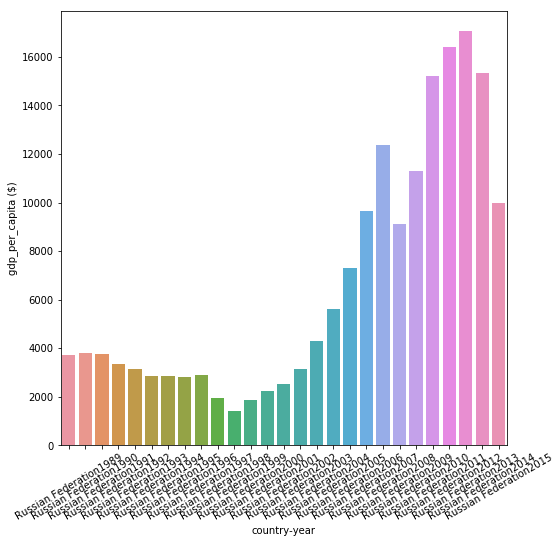

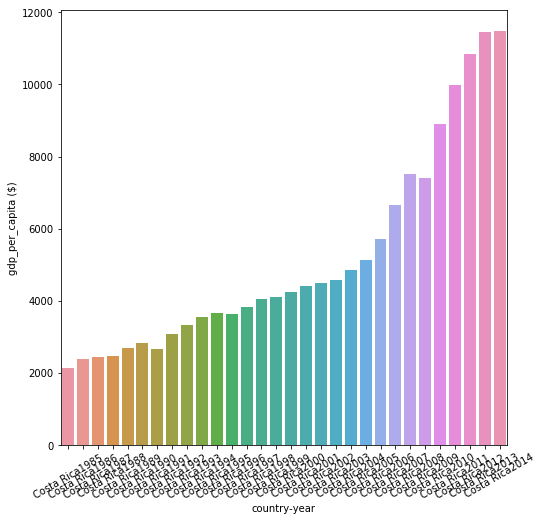

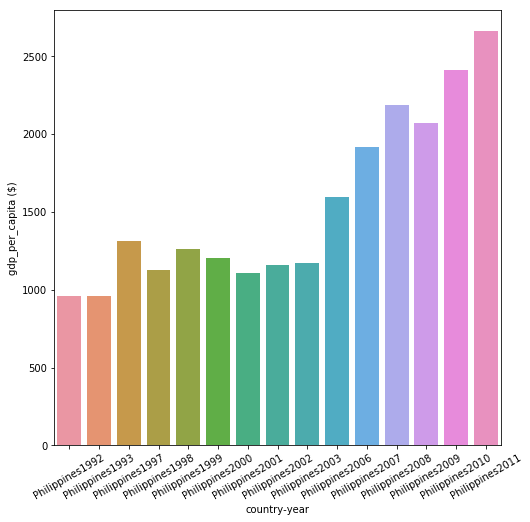

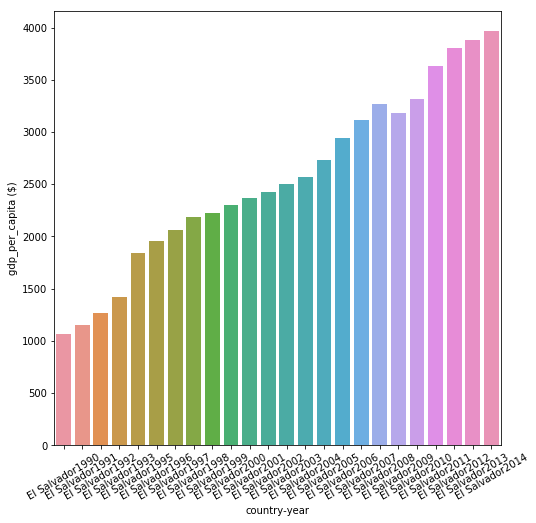

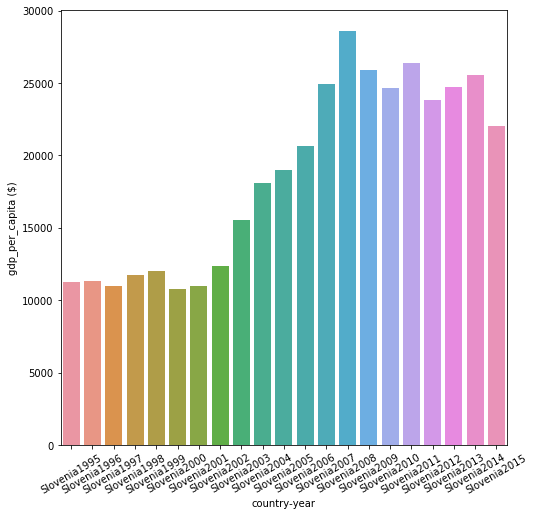

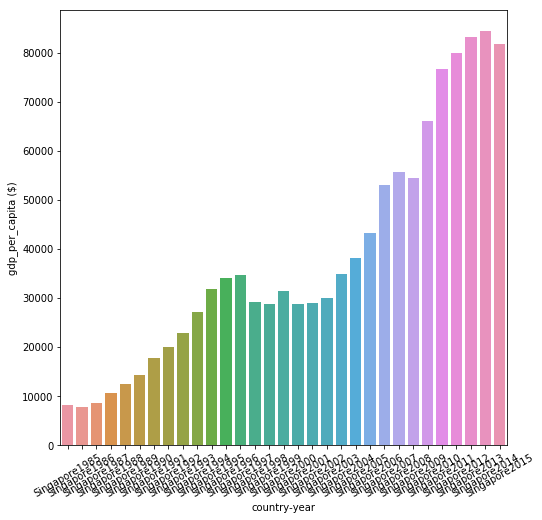

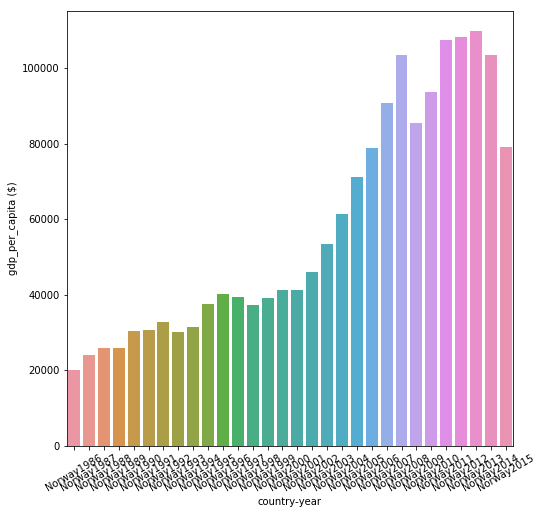

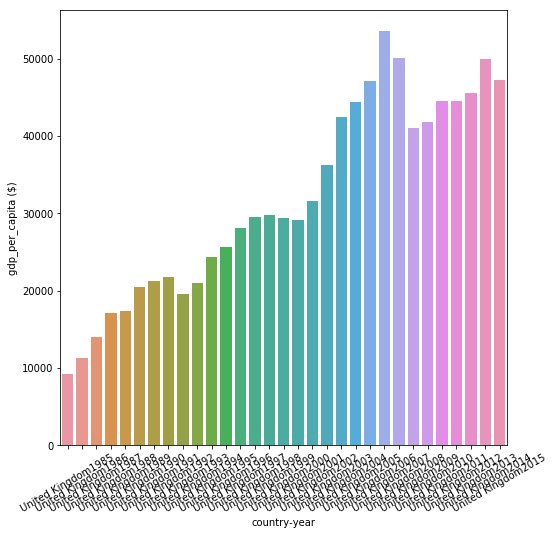

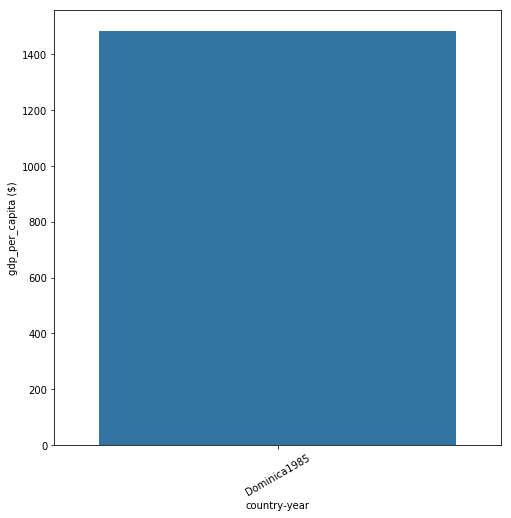

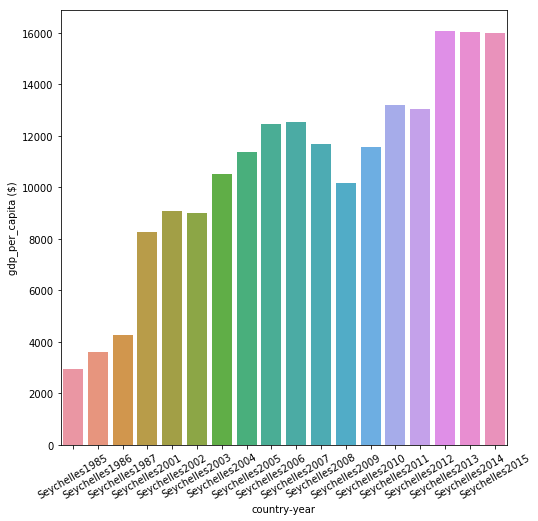

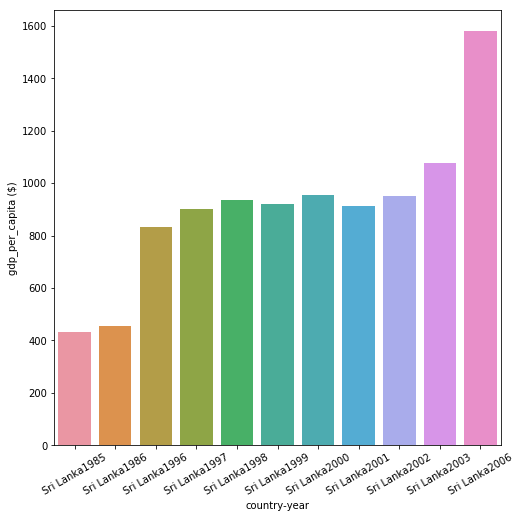

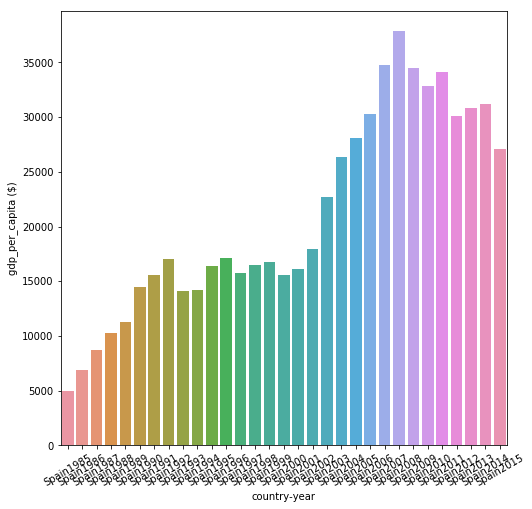

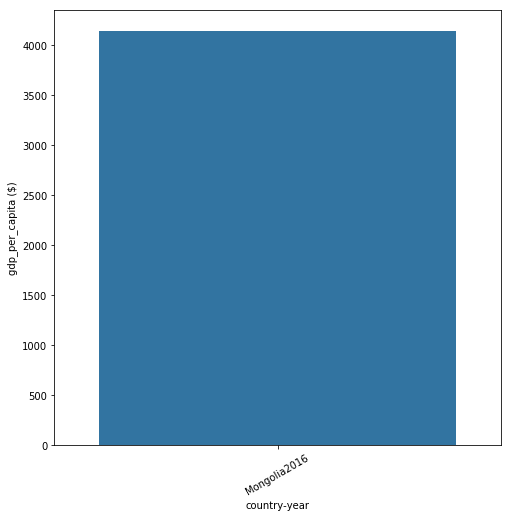

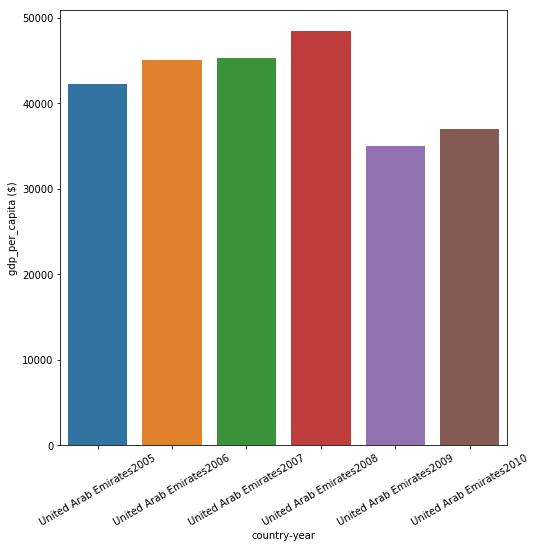

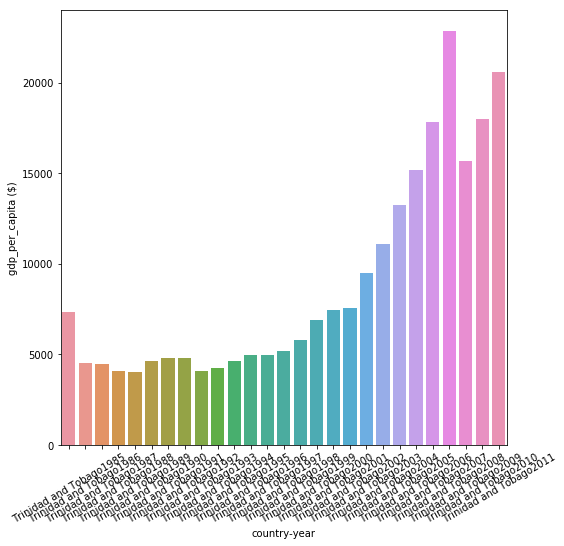

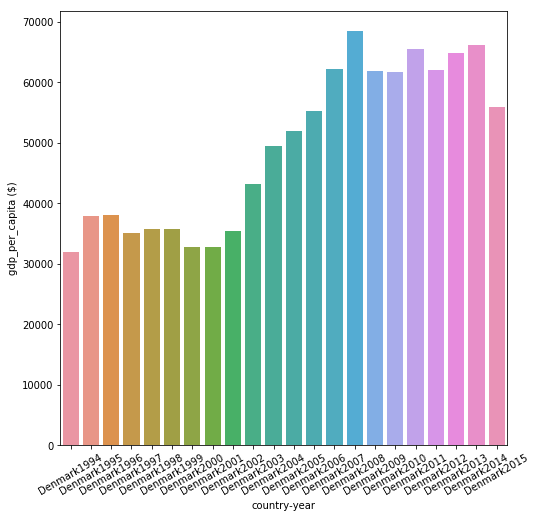

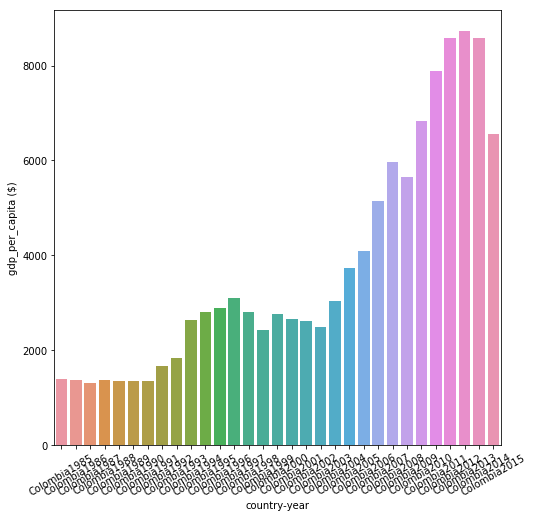

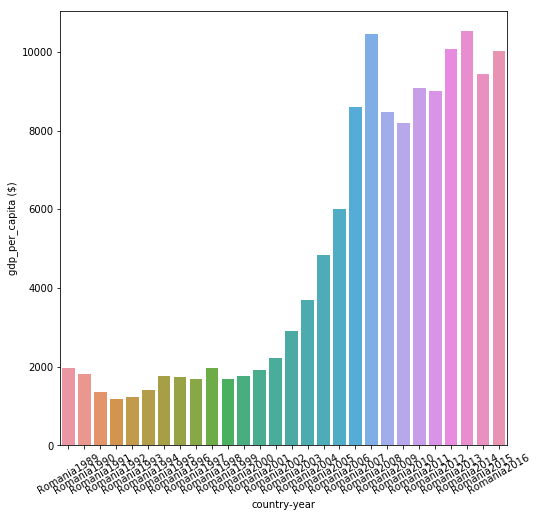

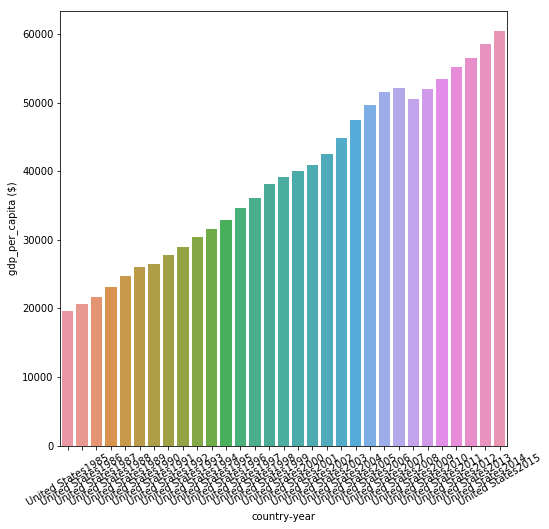

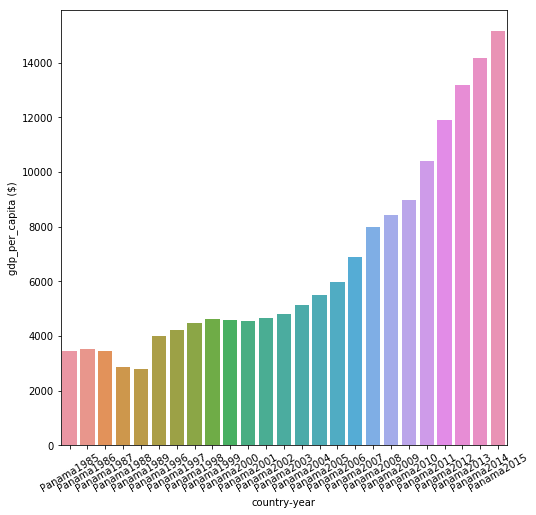

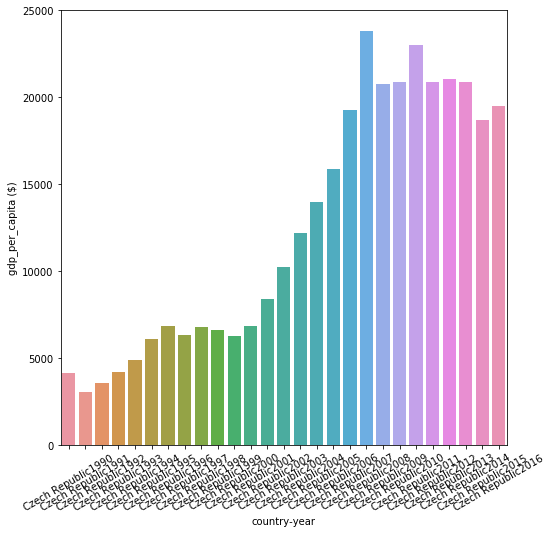

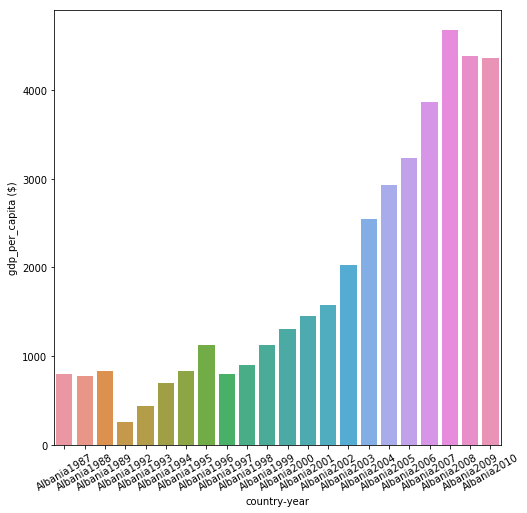

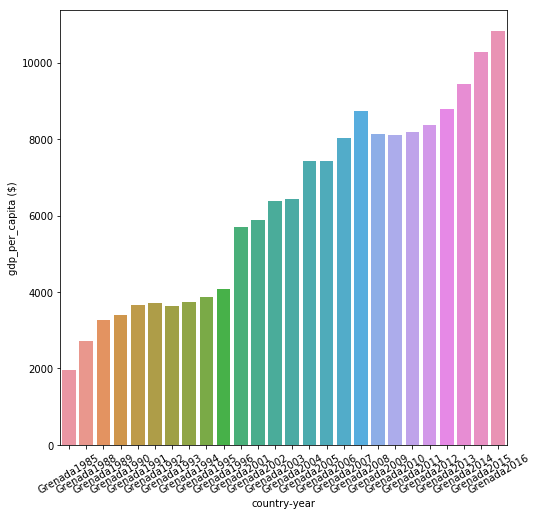

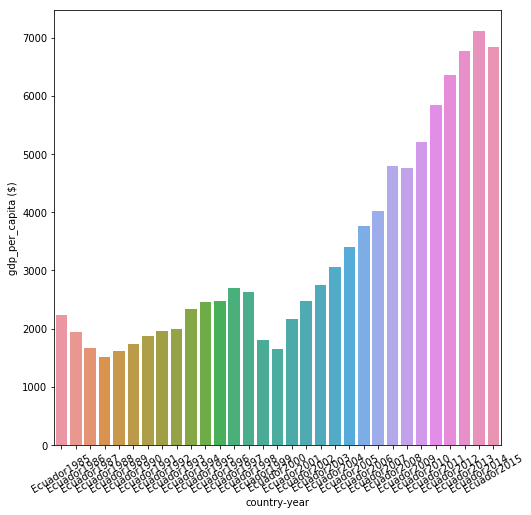

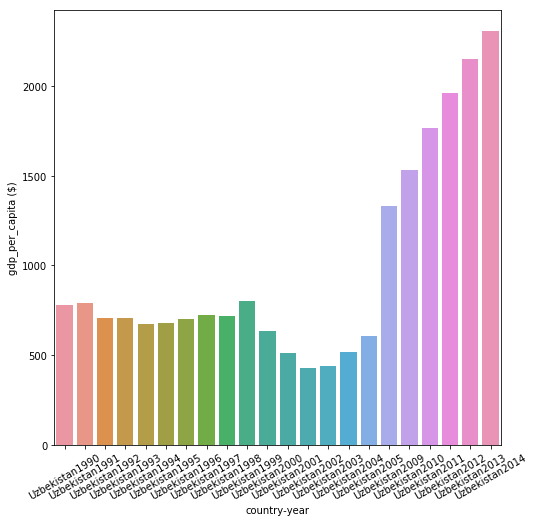

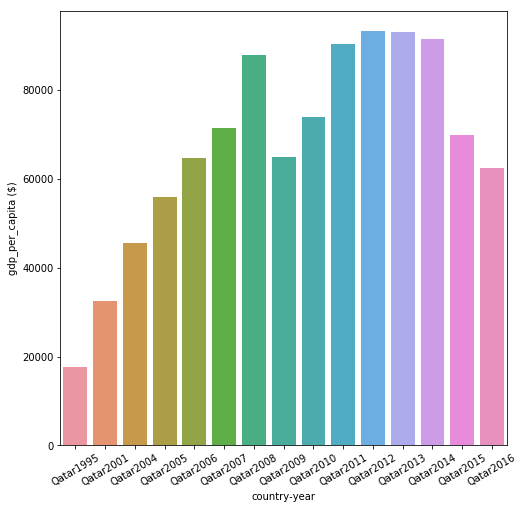

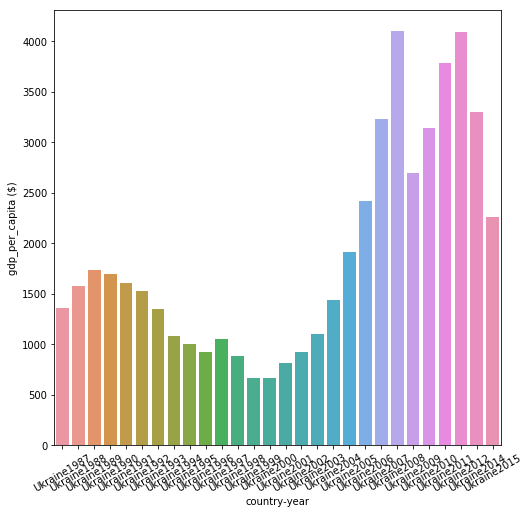

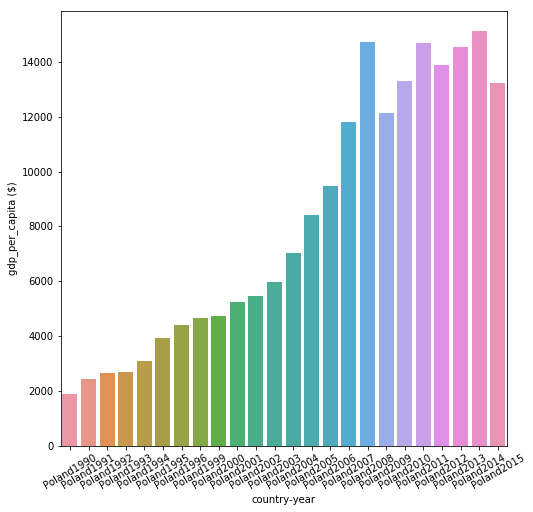

In [45]:
for e in set(data['country']):
    plt.figure(figsize= (8,8))
    ax = sns.barplot(x="country-year", y="gdp_per_capita ($)", data=data[data['country']==e])
    for label in ax.xaxis.get_ticklabels():
        label.set_rotation(30)
    plt.show()
    